___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Paula Daniela Cárdenas Gallardo </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `p.daniela.cardenas@gmail.com` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- Sales

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [1]:
#Librerías
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# Cargar datos
datos= pd.read_csv('/Users/Daniela Cardenas/Documents/ITESO/3° Semestre/Laboratorio de Modelado de Datos/carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [3]:
# Revisar si hay datos nulos
missing= pd.DataFrame(datos.isnull().sum(), columns= ['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


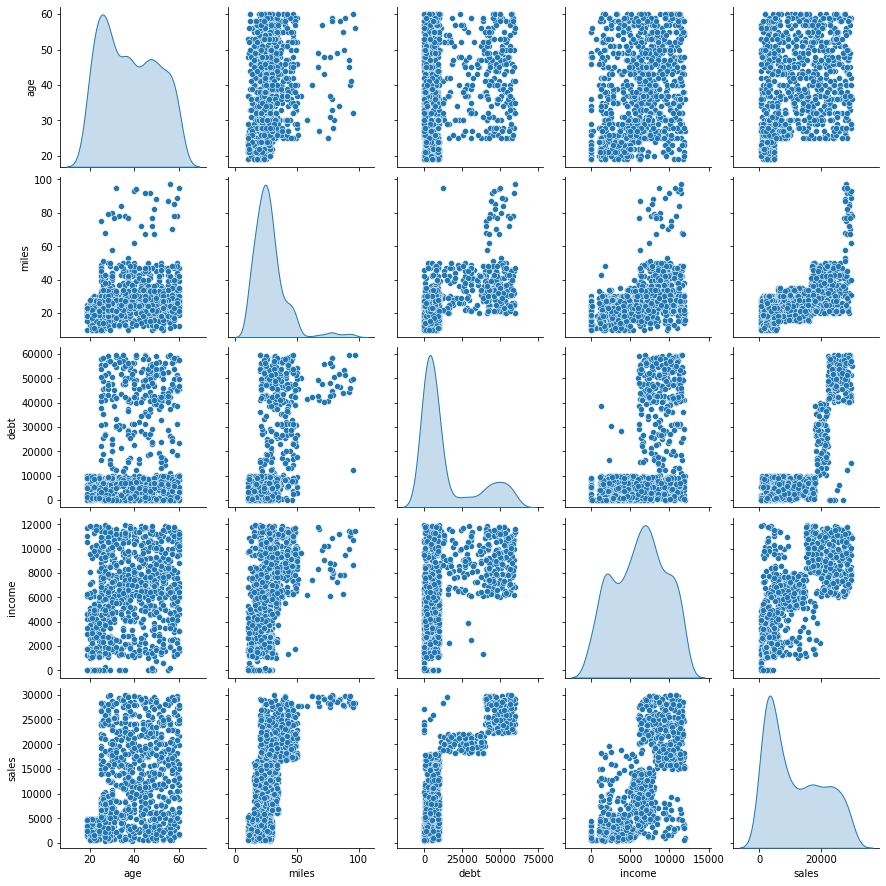

In [4]:
# Crear gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind= "kde")

In [5]:
# Calcular estadísticas básicas con los datos
datos_stats= datos.describe()
datos_stats= datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 

### Train Test split

In [6]:
# Separar la X y Y
X= datos.iloc[:,0:5]
y= datos.iloc[:,5]

# Dividir los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [7]:
#Estandarizar datos
from sklearn import preprocessing
X_train= preprocessing.scale(X_train)
y_train= preprocessing.scale(y_train)
X_test= preprocessing.scale(X_test)
y_test= preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

#### Regresión Lineal 


In [8]:
# Inicializar objeto de regresión lineal
lin_reg= LinearRegression()
# Entrenar modelo
lin_reg.fit(X_train,y_train)
# Predecir con datos de prueba
y_pred= lin_reg.predict(X_test)

# Métricas de performance
mae_lr= metrics.mean_absolute_error(y_test, y_pred)
mse_lr=metrics.mean_squared_error(y_test, y_pred)
r2_lr= metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('R2:  ', r2_lr)
print('MAE: ', mae_lr)
print('MSE: ', mse_lr)
print('RMSE:', np.sqrt(mse_lr))

R2:   0.8364108886819762
MAE:  0.3119007815345353
MSE:  0.1635891113180238
RMSE: 0.404461507832357


#### Regresión Lineal con selección de variables

In [9]:
# Entrenar modelo
rfe = RFE(lin_reg, n_features_to_select=4)             
rfe = rfe.fit(X_train, y_train)

# Predecir con datos de prueba
y_pred = rfe.predict(X_test)

# Métricas de performance
mae_rfe=metrics.mean_absolute_error(y_test, y_pred)
mse_rfe=metrics.mean_squared_error(y_test, y_pred)
r2_rfe = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('R2:  ',r2_rfe)
print('MAE: ', mae_rfe)
print('MSE: ', mse_rfe)
print('RMSE:', np.sqrt(mse_rfe))

R2:   0.8367174006172184
MAE:  0.31150993315869785
MSE:  0.16328259938278156
RMSE: 0.40408241657214133


#### Regresión Lineal con regularización Ridge


In [10]:
# Inicializo modelo de ridge con alpha = 1
ridge = Ridge(alpha=1)
# Entrenar modelo
ridge.fit(X_train,y_train)
# Predecir con datos de prueba
ridge_pred = ridge.predict(X_test)

# Métricas de performance
mae_ridge = metrics.mean_absolute_error(y_test, ridge_pred)
mse_ridge=metrics.mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

# Imprimir resultados
print('R2:  ',r2_ridge)
print('MAE: ', mae_ridge)
print('MSE: ', mse_ridge)
print('RMSE:', np.sqrt(mse_ridge))

R2:   0.8364172531254732
MAE:  0.3119341315613786
MSE:  0.16358274687452684
RMSE: 0.4044536399570745


#### Bosques Aleatorios

In [11]:
# Inicializar el bosque con 300 árboles
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

# Predecir el precio de venta  
y_pred = rf_regressor.predict(X_test)

# Calcular métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred)
mse_rf=metrics.mean_squared_error(y_test, y_pred)
r2_rf=metrics.r2_score(y_test, y_pred)

# Imprimir métricas
print('R2 square:',r2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)

R2 square: 0.9083834725974465
MAE:  0.2144253698676456
MSE:  0.0916165274025536


#### Máquina de Soporte Vectorial para Regresión (SVR)

In [12]:
# Inicializar objeto
regressor= SVR(kernel='rbf')
# Entrenar modelo
regressor.fit(X_train,y_train)
# Predecir
y_pred_svm=regressor.predict(X_test)

# Calcular métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svm)
r2_svr=metrics.r2_score(y_test, y_pred_svm)

# Imprimir métricas
print('R2 square:',r2_svr)
print('MAE: ', mae_svr)
print('MSE: ', mse_svr)

R2 square: 0.8939968531978245
MAE:  0.2368613686845287
MSE:  0.1060031468021755


#### Red Neuronal

In [13]:
# Hiperparámetros iniciales
epochs= 1000
learning_rate= 0.1
decay_rate= learning_rate/epochs
momentum= 0.8

# Crear arquitectura de la red neuronal
model= Sequential()
# 5 variables de entrada, por lo tanto input_dim=5
model.add(Dense(12,activation='relu',input_dim=5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

# Configuración del optimizador
# Gradiente descendente
opt= tf.keras.optimizers.SGD(lr= learning_rate, momentum= momentum,
                           decay= decay_rate, nesterov= True)
model.compile(loss= 'mean_squared_error',
              optimizer= opt,
              metrics= ['mae','mse'])

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
#Ajustar modelo
history= model.fit(X_train, y_train,
                    epochs= epochs,
                    batch_size= 200,
                    validation_data= (X_test, y_test))

Epoch 1/1000
4/4 [==============================] - 1s 56ms/step - loss: 1.0059 - mae: 0.8072 - mse: 1.0059 - val_loss: 0.2120 - val_mae: 0.3637 - val_mse: 0.2120
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2199 - mae: 0.3659 - mse: 0.2199 - val_loss: 0.1555 - val_mae: 0.3102 - val_mse: 0.1555
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1771 - mae: 0.3213 - mse: 0.1771 - val_loss: 0.1599 - val_mae: 0.3347 - val_mse: 0.1599
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1663 - mae: 0.3122 - mse: 0.1663 - val_loss: 0.1364 - val_mae: 0.2870 - val_mse: 0.1364
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1559 - mae: 0.2936 - mse: 0.1559 - val_loss: 0.1781 - val_mae: 0.3542 - val_mse: 0.1781
Epoch 6/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1677 - mae: 0.3077 - mse: 0.1677 - val_loss: 0.1545 - val_mae: 0.3266 - val_mse: 0.1545
Epoch 7/1000
4/4 [=======

4/4 [==============================] - 0s 10ms/step - loss: 0.1168 - mae: 0.2487 - mse: 0.1168 - val_loss: 0.1176 - val_mae: 0.2707 - val_mse: 0.1176
Epoch 102/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1207 - mae: 0.2557 - mse: 0.1207 - val_loss: 0.1096 - val_mae: 0.2426 - val_mse: 0.1096
Epoch 103/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1162 - mae: 0.2456 - mse: 0.1162 - val_loss: 0.1140 - val_mae: 0.2446 - val_mse: 0.1140
Epoch 104/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1175 - mae: 0.2474 - mse: 0.1175 - val_loss: 0.1315 - val_mae: 0.2632 - val_mse: 0.1315
Epoch 105/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1276 - mae: 0.2562 - mse: 0.1276 - val_loss: 0.1110 - val_mae: 0.2433 - val_mse: 0.1110
Epoch 106/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1186 - mae: 0.2504 - mse: 0.1186 - val_loss: 0.1086 - val_mae: 0.2458 - val_mse: 0.1086
Epoch 107/1000
4/4 [=====

Epoch 151/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1139 - mae: 0.2451 - mse: 0.1139 - val_loss: 0.1151 - val_mae: 0.2472 - val_mse: 0.1151
Epoch 152/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1139 - mae: 0.2449 - mse: 0.1139 - val_loss: 0.1159 - val_mae: 0.2448 - val_mse: 0.1159
Epoch 153/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1161 - mae: 0.2456 - mse: 0.1161 - val_loss: 0.1108 - val_mae: 0.2523 - val_mse: 0.1108
Epoch 154/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1171 - mae: 0.2511 - mse: 0.1171 - val_loss: 0.1104 - val_mae: 0.2516 - val_mse: 0.1104
Epoch 155/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1137 - mae: 0.2456 - mse: 0.1137 - val_loss: 0.1168 - val_mae: 0.2471 - val_mse: 0.1168
Epoch 156/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1194 - mae: 0.2506 - mse: 0.1194 - val_loss: 0.1200 - val_mae: 0.2748 - val_mse: 0.1200
Epoch 157/1000

Epoch 201/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1141 - mae: 0.2445 - mse: 0.1141 - val_loss: 0.1163 - val_mae: 0.2553 - val_mse: 0.1163
Epoch 202/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1156 - mae: 0.2477 - mse: 0.1156 - val_loss: 0.1141 - val_mae: 0.2531 - val_mse: 0.1141
Epoch 203/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1123 - mae: 0.2416 - mse: 0.1123 - val_loss: 0.1115 - val_mae: 0.2434 - val_mse: 0.1115
Epoch 204/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1135 - mae: 0.2417 - mse: 0.1135 - val_loss: 0.1173 - val_mae: 0.2467 - val_mse: 0.1173
Epoch 205/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1137 - mae: 0.2432 - mse: 0.1137 - val_loss: 0.1241 - val_mae: 0.2778 - val_mse: 0.1241
Epoch 206/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1187 - mae: 0.2523 - mse: 0.1187 - val_loss: 0.1137 - val_mae: 0.2508 - val_mse: 0.1137
Epoch 207/

Epoch 251/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1122 - mae: 0.2464 - mse: 0.1122 - val_loss: 0.1169 - val_mae: 0.2495 - val_mse: 0.1169
Epoch 252/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1121 - mae: 0.2417 - mse: 0.1121 - val_loss: 0.1139 - val_mae: 0.2452 - val_mse: 0.1139
Epoch 253/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1101 - mae: 0.2430 - mse: 0.1101 - val_loss: 0.1154 - val_mae: 0.2458 - val_mse: 0.1154
Epoch 254/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1133 - mae: 0.2458 - mse: 0.1133 - val_loss: 0.1104 - val_mae: 0.2514 - val_mse: 0.1104
Epoch 255/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1102 - mae: 0.2409 - mse: 0.1102 - val_loss: 0.1138 - val_mae: 0.2554 - val_mse: 0.1138
Epoch 256/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1132 - mae: 0.2448 - mse: 0.1132 - val_loss: 0.1097 - val_mae: 0.2383 - val_mse: 0.1097
Epoch 257/1000
4

Epoch 301/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1091 - mae: 0.2371 - mse: 0.1091 - val_loss: 0.1349 - val_mae: 0.2960 - val_mse: 0.1349
Epoch 302/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1159 - mae: 0.2522 - mse: 0.1159 - val_loss: 0.1110 - val_mae: 0.2401 - val_mse: 0.1110
Epoch 303/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1090 - mae: 0.2367 - mse: 0.1090 - val_loss: 0.1116 - val_mae: 0.2429 - val_mse: 0.1116
Epoch 304/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1105 - mae: 0.2390 - mse: 0.1105 - val_loss: 0.1156 - val_mae: 0.2551 - val_mse: 0.1156
Epoch 305/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1101 - mae: 0.2394 - mse: 0.1101 - val_loss: 0.1082 - val_mae: 0.2413 - val_mse: 0.1082
Epoch 306/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1074 - mae: 0.2372 - mse: 0.1074 - val_loss: 0.1237 - val_mae: 0.2518 - val_mse: 0.1237
Epoch 307/

Epoch 351/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1073 - mae: 0.2363 - mse: 0.1073 - val_loss: 0.1088 - val_mae: 0.2391 - val_mse: 0.1088
Epoch 352/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1076 - mae: 0.2348 - mse: 0.1076 - val_loss: 0.1093 - val_mae: 0.2444 - val_mse: 0.1093
Epoch 353/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1071 - mae: 0.2376 - mse: 0.1071 - val_loss: 0.1211 - val_mae: 0.2488 - val_mse: 0.1211
Epoch 354/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1078 - mae: 0.2356 - mse: 0.1078 - val_loss: 0.1118 - val_mae: 0.2549 - val_mse: 0.1118
Epoch 355/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1096 - mae: 0.2376 - mse: 0.1096 - val_loss: 0.1133 - val_mae: 0.2501 - val_mse: 0.1133
Epoch 356/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1108 - mae: 0.2411 - mse: 0.1108 - val_loss: 0.1104 - val_mae: 0.2438 - val_mse: 0.1104
Epoch 357/10

Epoch 401/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1064 - mae: 0.2347 - mse: 0.1064 - val_loss: 0.1136 - val_mae: 0.2418 - val_mse: 0.1136
Epoch 402/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1086 - mae: 0.2383 - mse: 0.1086 - val_loss: 0.1107 - val_mae: 0.2426 - val_mse: 0.1107
Epoch 403/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1068 - mae: 0.2352 - mse: 0.1068 - val_loss: 0.1115 - val_mae: 0.2432 - val_mse: 0.1115
Epoch 404/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1065 - mae: 0.2337 - mse: 0.1065 - val_loss: 0.1144 - val_mae: 0.2526 - val_mse: 0.1144
Epoch 405/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1067 - mae: 0.2354 - mse: 0.1067 - val_loss: 0.1164 - val_mae: 0.2587 - val_mse: 0.1164
Epoch 406/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1111 - mae: 0.2434 - mse: 0.1111 - val_loss: 0.1164 - val_mae: 0.2491 - val_mse: 0.1164
Epoch 407/1000
4

Epoch 451/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1081 - mae: 0.2376 - mse: 0.1081 - val_loss: 0.1164 - val_mae: 0.2450 - val_mse: 0.1164
Epoch 452/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1070 - mae: 0.2338 - mse: 0.1070 - val_loss: 0.1189 - val_mae: 0.2614 - val_mse: 0.1189
Epoch 453/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1067 - mae: 0.2386 - mse: 0.1067 - val_loss: 0.1152 - val_mae: 0.2498 - val_mse: 0.1152
Epoch 454/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1054 - mae: 0.2355 - mse: 0.1054 - val_loss: 0.1173 - val_mae: 0.2471 - val_mse: 0.1173
Epoch 455/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1043 - mae: 0.2305 - mse: 0.1043 - val_loss: 0.1130 - val_mae: 0.2497 - val_mse: 0.1130
Epoch 456/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1072 - mae: 0.2352 - mse: 0.1072 - val_loss: 0.1155 - val_mae: 0.2474 - val_mse: 0.1155
Epoch 457/

Epoch 501/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1041 - mae: 0.2321 - mse: 0.1041 - val_loss: 0.1185 - val_mae: 0.2526 - val_mse: 0.1185
Epoch 502/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1066 - mae: 0.2369 - mse: 0.1066 - val_loss: 0.1399 - val_mae: 0.2715 - val_mse: 0.1399
Epoch 503/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1074 - mae: 0.2356 - mse: 0.1074 - val_loss: 0.1155 - val_mae: 0.2601 - val_mse: 0.1155
Epoch 504/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1047 - mae: 0.2343 - mse: 0.1047 - val_loss: 0.1147 - val_mae: 0.2447 - val_mse: 0.1147
Epoch 505/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1082 - mae: 0.2363 - mse: 0.1082 - val_loss: 0.1281 - val_mae: 0.2825 - val_mse: 0.1281
Epoch 506/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1206 - mae: 0.2564 - mse: 0.1206 - val_loss: 0.1278 - val_mae: 0.2825 - val_mse: 0.1278
Epoch 507/

Epoch 551/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1043 - mae: 0.2329 - mse: 0.1043 - val_loss: 0.1158 - val_mae: 0.2480 - val_mse: 0.1158
Epoch 552/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1030 - mae: 0.2309 - mse: 0.1030 - val_loss: 0.1170 - val_mae: 0.2602 - val_mse: 0.1170
Epoch 553/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1042 - mae: 0.2356 - mse: 0.1042 - val_loss: 0.1157 - val_mae: 0.2541 - val_mse: 0.1157
Epoch 554/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1035 - mae: 0.2314 - mse: 0.1035 - val_loss: 0.1220 - val_mae: 0.2712 - val_mse: 0.1220
Epoch 555/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1069 - mae: 0.2365 - mse: 0.1069 - val_loss: 0.1137 - val_mae: 0.2488 - val_mse: 0.1137
Epoch 556/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1035 - mae: 0.2295 - mse: 0.1035 - val_loss: 0.1148 - val_mae: 0.2509 - val_mse: 0.1148
Epoch 557/1000

Epoch 601/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1064 - mae: 0.2346 - mse: 0.1064 - val_loss: 0.1173 - val_mae: 0.2582 - val_mse: 0.1173
Epoch 602/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1043 - mae: 0.2331 - mse: 0.1043 - val_loss: 0.1184 - val_mae: 0.2514 - val_mse: 0.1184
Epoch 603/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1040 - mae: 0.2320 - mse: 0.1040 - val_loss: 0.1174 - val_mae: 0.2526 - val_mse: 0.1174
Epoch 604/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1038 - mae: 0.2292 - mse: 0.1038 - val_loss: 0.1436 - val_mae: 0.3033 - val_mse: 0.1436
Epoch 605/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1160 - mae: 0.2521 - mse: 0.1160 - val_loss: 0.1201 - val_mae: 0.2549 - val_mse: 0.1201
Epoch 606/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1041 - mae: 0.2311 - mse: 0.1041 - val_loss: 0.1203 - val_mae: 0.2619 - val_mse: 0.1203
Epoch 607/

Epoch 651/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1046 - mae: 0.2306 - mse: 0.1046 - val_loss: 0.1260 - val_mae: 0.2764 - val_mse: 0.1260
Epoch 652/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1039 - mae: 0.2360 - mse: 0.1039 - val_loss: 0.1215 - val_mae: 0.2542 - val_mse: 0.1215
Epoch 653/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1058 - mae: 0.2364 - mse: 0.1058 - val_loss: 0.1168 - val_mae: 0.2519 - val_mse: 0.1168
Epoch 654/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1017 - mae: 0.2278 - mse: 0.1017 - val_loss: 0.1232 - val_mae: 0.2682 - val_mse: 0.1232
Epoch 655/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1074 - mae: 0.2389 - mse: 0.1074 - val_loss: 0.1293 - val_mae: 0.2623 - val_mse: 0.1293
Epoch 656/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1032 - mae: 0.2301 - mse: 0.1032 - val_loss: 0.1195 - val_mae: 0.2548 - val_mse: 0.1195
Epoch 657/1000
4

Epoch 701/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1034 - mae: 0.2314 - mse: 0.1034 - val_loss: 0.1167 - val_mae: 0.2549 - val_mse: 0.1167
Epoch 702/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1006 - mae: 0.2258 - mse: 0.1006 - val_loss: 0.1197 - val_mae: 0.2568 - val_mse: 0.1197
Epoch 703/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1028 - mae: 0.2310 - mse: 0.1028 - val_loss: 0.1249 - val_mae: 0.2755 - val_mse: 0.1249
Epoch 704/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1051 - mae: 0.2369 - mse: 0.1051 - val_loss: 0.1202 - val_mae: 0.2545 - val_mse: 0.1202
Epoch 705/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1027 - mae: 0.2284 - mse: 0.1027 - val_loss: 0.1226 - val_mae: 0.2658 - val_mse: 0.1226
Epoch 706/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1045 - mae: 0.2341 - mse: 0.1045 - val_loss: 0.1345 - val_mae: 0.2658 - val_mse: 0.1345
Epoch 707/

Epoch 751/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1023 - mae: 0.2315 - mse: 0.1023 - val_loss: 0.1190 - val_mae: 0.2587 - val_mse: 0.1190
Epoch 752/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1032 - mae: 0.2339 - mse: 0.1032 - val_loss: 0.1265 - val_mae: 0.2605 - val_mse: 0.1265
Epoch 753/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0996 - mae: 0.2261 - mse: 0.0996 - val_loss: 0.1221 - val_mae: 0.2605 - val_mse: 0.1221
Epoch 754/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0993 - mae: 0.2243 - mse: 0.0993 - val_loss: 0.1258 - val_mae: 0.2732 - val_mse: 0.1258
Epoch 755/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1032 - mae: 0.2313 - mse: 0.1032 - val_loss: 0.1230 - val_mae: 0.2573 - val_mse: 0.1230
Epoch 756/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1007 - mae: 0.2283 - mse: 0.1007 - val_loss: 0.1334 - val_mae: 0.2640 - val_mse: 0.1334
Epoch 757/

Epoch 801/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1010 - mae: 0.2272 - mse: 0.1010 - val_loss: 0.1199 - val_mae: 0.2602 - val_mse: 0.1199
Epoch 802/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0998 - mae: 0.2253 - mse: 0.0998 - val_loss: 0.1294 - val_mae: 0.2607 - val_mse: 0.1294
Epoch 803/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0997 - mae: 0.2267 - mse: 0.0997 - val_loss: 0.1469 - val_mae: 0.2770 - val_mse: 0.1469
Epoch 804/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1093 - mae: 0.2405 - mse: 0.1093 - val_loss: 0.1390 - val_mae: 0.2697 - val_mse: 0.1390
Epoch 805/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1025 - mae: 0.2318 - mse: 0.1025 - val_loss: 0.1248 - val_mae: 0.2573 - val_mse: 0.1248
Epoch 806/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0989 - mae: 0.2205 - mse: 0.0989 - val_loss: 0.1241 - val_mae: 0.2673 - val_mse: 0.1241
Epoch 807/1000
4

Epoch 900/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0969 - mae: 0.2263 - mse: 0.0969 - val_loss: 0.1293 - val_mae: 0.2742 - val_mse: 0.1293
Epoch 901/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0979 - mae: 0.2264 - mse: 0.0979 - val_loss: 0.1244 - val_mae: 0.2640 - val_mse: 0.1244
Epoch 902/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0962 - mae: 0.2237 - mse: 0.0962 - val_loss: 0.1228 - val_mae: 0.2679 - val_mse: 0.1228
Epoch 903/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0959 - mae: 0.2237 - mse: 0.0959 - val_loss: 0.1762 - val_mae: 0.3130 - val_mse: 0.1762
Epoch 904/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1168 - mae: 0.2557 - mse: 0.1168 - val_loss: 0.1210 - val_mae: 0.2611 - val_mse: 0.1210
Epoch 905/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0987 - mae: 0.2263 - mse: 0.0987 - val_loss: 0.1262 - val_mae: 0.2642 - val_mse: 0.1262
Epoch 906/1

Epoch 950/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0965 - mae: 0.2242 - mse: 0.0965 - val_loss: 0.1315 - val_mae: 0.2599 - val_mse: 0.1315
Epoch 951/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0956 - mae: 0.2211 - mse: 0.0956 - val_loss: 0.1282 - val_mae: 0.2593 - val_mse: 0.1282
Epoch 952/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0930 - mae: 0.2168 - mse: 0.0930 - val_loss: 0.1255 - val_mae: 0.2638 - val_mse: 0.1255
Epoch 953/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0955 - mae: 0.2213 - mse: 0.0955 - val_loss: 0.1382 - val_mae: 0.2705 - val_mse: 0.1382
Epoch 954/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0975 - mae: 0.2265 - mse: 0.0975 - val_loss: 0.1241 - val_mae: 0.2595 - val_mse: 0.1241
Epoch 955/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0946 - mae: 0.2193 - mse: 0.0946 - val_loss: 0.1274 - val_mae: 0.2594 - val_mse: 0.1274
Epoch 956/100

Epoch 1000/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0918 - mae: 0.2184 - mse: 0.0918 - val_loss: 0.1265 - val_mae: 0.2626 - val_mse: 0.1265


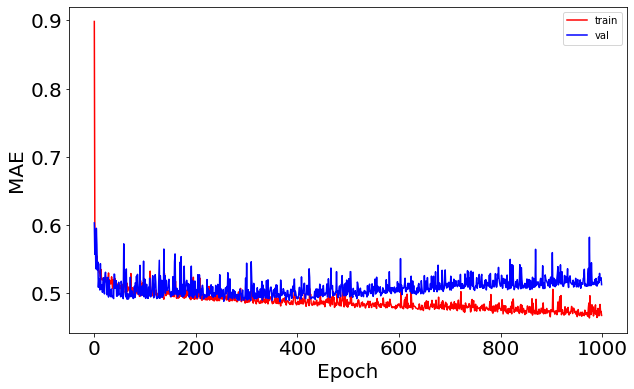

In [15]:
#Graficar el MAE
fig, ax= plt.subplots(1, 1, figsize= (10, 6))
ax.plot(np.sqrt(history.history['mae']), 'r', label= 'train')
ax.plot(np.sqrt(history.history['val_mae']), 'b', label= 'val')
ax.set_xlabel(r'Epoch', fontsize= 20)
ax.set_ylabel(r'MAE', fontsize= 20)
ax.legend()
ax.tick_params(labelsize= 20)

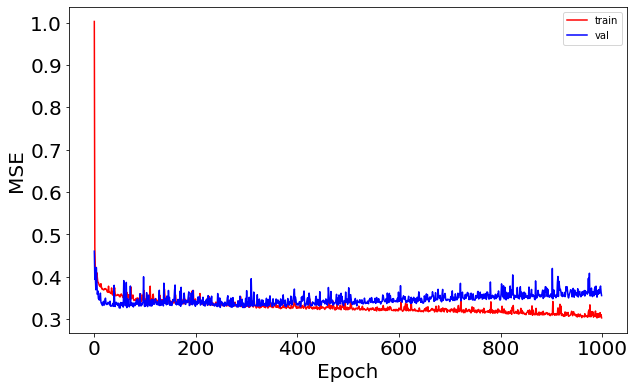

In [16]:
#Graficar el MSE
fig, ax= plt.subplots(1, 1, figsize= (10, 6))
ax.plot(np.sqrt(history.history['mse']), 'r', label= 'train')
ax.plot(np.sqrt(history.history['val_mse']), 'b', label= 'val')
ax.set_xlabel(r'Epoch', fontsize= 20)
ax.set_ylabel(r'MSE', fontsize= 20)
ax.legend()
ax.tick_params(labelsize= 20)

Con los gráficos de arriba podemos observar que tanto las métricas de train y de validación disminuyen exponencialmentes con el incremento del número de épocas. 

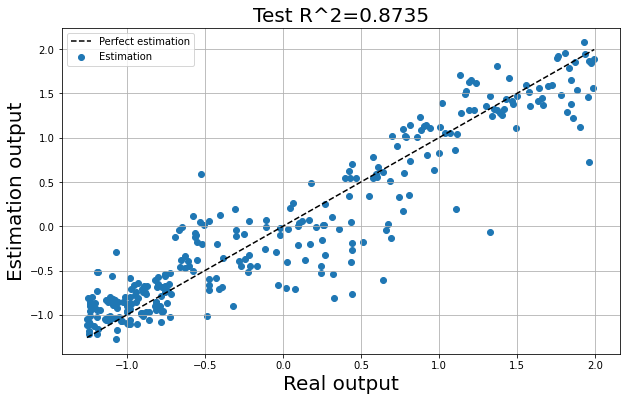

In [17]:
#Predecir
yhat = model.predict(X_test)

#Calcular R2
R2_score = r2_score(y_test,yhat)

#Graficar la R2
xmin, xmax= min(y_test), max(y_test)
xline= np.linspace(xmin, xmax)
fig= plt.figure(figsize= (10, 6))
plt.scatter(y_test,yhat,label= 'Estimation')
plt.plot(xline,xline,'k--', label= 'Perfect estimation')
plt.xlabel('Real output', fontsize= 20)
plt.ylabel('Estimation output', fontsize= 20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize= 20)
plt.legend()
plt.grid()
plt.show()

In [18]:
#Calcular métricas
mae_nn= metrics.mean_absolute_error(y_test, yhat)
mse_nn= metrics.mean_squared_error(y_test, yhat)
r2_nn= metrics.r2_score(y_test, yhat)

# imprimir Métricas
print('R2 square:', r2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)

R2 square: 0.8735245084317129
MAE:  0.2626498709317014
MSE:  0.12647549156828705


#### Resultados con train test split

In [19]:
data_compar_train_test= {'Modelo': ['LR', 'LR RFE', 'Ridge', 'RF', ' SVR', 'NN'], 'R2': [r2_lr, r2_rfe, r2_ridge, r2_rf, r2_svr, r2_nn], 'MSE': [mse_lr, mse_rfe, mse_ridge, mse_rf, mse_svr, mse_nn], 'MAE': [mae_lr, mae_rfe, mae_ridge,mae_rf,mae_svr, mae_nn]} 
data_compar_train_test= pd.DataFrame(data_compar_train_test)
data_compar_train_test

,Modelo,R2,MSE,MAE
0,LR,0.836411,0.163589,0.311901
1,LR RFE,0.836717,0.163283,0.311510
2,Ridge,0.836417,0.163583,0.311934
3,RF,0.908383,0.091617,0.214425
4,SVR,0.893997,0.106003,0.236861
5,NN,0.873525,0.126475,0.262650


### Cross Validation con optimización de hiperparámetros

La idea es dividir los datos en train y test, entrenar múltiples modelos muestreando los datos de entrenamiento. 
Finalmente probar el modelo en el test set



<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/700/1*4G__SV580CxFj78o9yUXuQ.png" width="450px" height="280px" />


In [20]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds= 5
seed= 7
scoring= 'neg_mean_squared_error'
kfold= KFold(n_splits=n_folds, random_state=seed, shuffle=True)

#### Regresión Lineal

In [21]:
#Inicializar modelo
lm= LinearRegression()

#Hacer el cross validation
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_lr)

MSE 0.18158541560608504


#### Regresión lineal con selección de variables (RFE)

In [22]:
# Hacer el grid search
#Especificar el modelo
lm = LinearRegression()
#Ajustar datos
lm.fit(X_train, y_train)
#Inicializar modelo de Recursive Feature Elimination para selección de variables
rfe = RFE(lm)             

#Especificar rango de hiperparámetros a tunear
hyper_params = [{'n_features_to_select': list(range(1, np.shape(X_train)[1]+1))}]

# Crear el grid search
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      

# Entrenar modelo
model_cv.fit(X_train, y_train) 


# cv resultados
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['mean_train_score'] = -cv_results['mean_train_score']
cv_results

# Observar la penúltima columna; 'mean_train_score' y elegir el más pequeño. Después, en esa misma fila observar los
# parámetros a seleccionar 'param_n_features_to_select'

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004244,0.000912,0.000154,0.000202,1,{'n_features_to_select': 1},-0.321596,-0.263574,-0.424232,-0.255498,...,-0.312623,0.060686,5,-0.308846,-0.323449,-0.283638,-0.325489,-0.314806,0.311246,0.015049
1,0.002445,0.000347,0.000471,0.000611,2,{'n_features_to_select': 2},-0.232072,-0.183370,-0.263436,-0.196780,...,-0.216501,0.028373,4,-0.209800,-0.222133,-0.202901,-0.218728,-0.216196,0.213952,0.006843
2,0.002571,0.001076,0.000430,0.000387,3,{'n_features_to_select': 3},-0.212934,-0.159080,-0.219450,-0.169971,...,-0.190506,0.023454,3,-0.182087,-0.195243,-0.180983,-0.192551,-0.187345,0.187642,0.005606
3,0.002109,0.000997,0.000405,0.000382,4,{'n_features_to_select': 4},-0.195132,-0.144301,-0.228759,-0.159434,...,-0.181349,0.029310,1,-0.173999,-0.186198,-0.166410,-0.182465,-0.177559,0.177326,0.006862
4,0.001538,0.000461,0.000542,0.000329,5,{'n_features_to_select': 5},-0.195382,-0.144567,-0.229107,-0.159635,...,-0.181585,0.029347,2,-0.173862,-0.186050,-0.166401,-0.182340,-0.177444,0.177219,0.006820


#### Rigde

In [23]:
from sklearn.linear_model import RidgeCV
#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
model = RidgeCV(alphas=np.arange(0,1,0.01), cv=kfold, scoring='neg_mean_squared_error') 
#Entreno modelo
model.fit(X_train, y_train)

#Obtener métricas
mse_ridge = -model.best_score_
print('alfa: %f' % model.alpha_)
print('MSE',mse_ridge)

alfa: 0.990000
MSE 0.18157632845372015


#### Random Forest



In [25]:
from sklearn.ensemble import RandomForestRegressor

#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV
#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800],
                                'criterion': ['mse']}, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)
print(gs.best_params_)

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 800}


In [26]:
#crear modelo usando parámetros óptimos
new_model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
#print("R2", r2_lr)
#mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
#print("MAE", mae_lr)
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_rf)

MSE 0.10667653653789569


#### Árbol de decisión

In [28]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [29]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_tree)

MSE 0.11514499443663606


#### Máquina de vector soporte (SVR)

In [30]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [31]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='rbf', C=1000, gamma=0.001)
mse_svr= (-cross_val_score(new_model_svr, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_svr)

MSE 0.15140710445214683


#### Red Neuronal

In [33]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = tf.keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

print('Mejores parámetros:')
print(grid_result.best_params_)


C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.3600 - mse: 0.3600
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1831 - mse: 0.1831
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1720 - mse: 0.1720
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1632 - mse: 0.1632
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1439 - mse: 0.1439
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1418 - mse: 0.1418
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.1525
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1500 - mse: 0.1500
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126
Epoch 172/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1075 - mse: 0.1075
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1026 - mse: 0.1026
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1007 - mse: 0.1007
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1083 - mse: 0.1083
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.1226
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1034 - mse: 0.1034
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1073 - mse: 0.1073
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1084 - mse: 0.1084
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.3524 - mse: 0.3524
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2052 - mse: 0.2052
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1845 - mse: 0.1845
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1852 - mse: 0.1852
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1880 - mse: 0.1880
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1761 - mse: 0.1761
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1684 - mse: 0.1684
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1762 - mse: 0.1762
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1599 - mse: 0.1599
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1623 - mse: 0.1623
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1203 - mse: 0.1203
Epoch 172/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.1210
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1137 - mse: 0.1137
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1165 - mse: 0.1165
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1176 - mse: 0.1176
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1075 - mse: 0.1075
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1101 - mse: 0.1101
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1096 - mse: 0.1096
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.4416 - mse: 0.4416
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2291 - mse: 0.2291
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1904 - mse: 0.1904
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1610 - mse: 0.1610
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1602 - mse: 0.1602
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1357 - mse: 0.1357
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1340 - mse: 0.1340
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1451 - mse: 0.1451
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1409 - mse: 0.1409
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1342 - mse: 0.1342
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.0981 - mse: 0.0981
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0941 - mse: 0.0941
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0937 - mse: 0.0937
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1009 - mse: 0.1009
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0925 - mse: 0.0925
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1093 - mse: 0.1093
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0989 - mse: 0.0989
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1012 - mse: 0.1012
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.3327 - mse: 0.3327
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1885 - mse: 0.1885
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1716 - mse: 0.1716
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1434 - mse: 0.1434
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1513 - mse: 0.1513
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1528 - mse: 0.1528
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.1402
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1348 - mse: 0.1348
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1406 - mse: 0.1406
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1466 - mse: 0.1466
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1079 - mse: 0.1079
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0994 - mse: 0.0994
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1062 - mse: 0.1062
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1086 - mse: 0.1086
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1041 - mse: 0.1041
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1017 - mse: 0.1017
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1033 - mse: 0.1033
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1054 - mse: 0.1054
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0999 - mse: 0.0999
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0974 - mse: 0.0974
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.5315 - mse: 0.5315
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2201 - mse: 0.2201
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1979 - mse: 0.1979
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1985 - mse: 0.1985
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2040 - mse: 0.2040
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1863 - mse: 0.1863
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1667 - mse: 0.1667
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1724 - mse: 0.1724
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2011 - mse: 0.2011
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1668 - mse: 0.1668
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.1159
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1120 - mse: 0.1120
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1137 - mse: 0.1137
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1203 - mse: 0.1203
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1056 - mse: 0.1056
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1115 - mse: 0.1115
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1063 - mse: 0.1063
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.4166 - mse: 0.4166
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1910 - mse: 0.1910
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1711 - mse: 0.1711
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1602 - mse: 0.1602
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1521 - mse: 0.1521
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.1486
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1457 - mse: 0.1457
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1411 - mse: 0.1411
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1497 - mse: 0.1497
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.1380
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1035 - mse: 0.1035
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1026 - mse: 0.1026
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1013 - mse: 0.1013
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1048 - mse: 0.1048
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0986 - mse: 0.0986
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1036 - mse: 0.1036
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1011 - mse: 0.1011
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1035 - mse: 0.1035
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1004 - mse: 0.1004
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0942 - mse: 0.0942
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.4558 - mse: 0.4558
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2017 - mse: 0.2017
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1852 - mse: 0.1852
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1694 - mse: 0.1694
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1659 - mse: 0.1659
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1628 - mse: 0.1628
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1736 - mse: 0.1736
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1653 - mse: 0.1653
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.1574
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1162 - mse: 0.1162
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.1161
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.1143
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.3119 - mse: 0.3119
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1665 - mse: 0.1665
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1593 - mse: 0.1593
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1475 - mse: 0.1475
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1407 - mse: 0.1407
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1372 - mse: 0.1372
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1394 - mse: 0.1394
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1332 - mse: 0.1332
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1330 - mse: 0.1330
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1329 - mse: 0.1329
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 0.1043
Epoch 175/200
17/17 [==============================] - 0s 965us/step - loss: 0.1055 - mse: 0.1055
Epoch 176/200
17/17 [==============================] - 0s 972us/step - loss: 0.1067 - mse: 0.1067
Epoch 177/200
17/17 [==============================] - 0s 896us/step - loss: 0.1009 - mse: 0.1009
Epoch 178/200
17/17 [==============================] - 0s 946us/step - loss: 0.1095 - mse: 0.1095
Epoch 179/200
17/17 [==============================] - 0s 809us/step - loss: 0.1025 - mse: 0.1025
Epoch 180/200
17/17 [==============================] - 0s 974us/step - loss: 0.1066 - mse: 0.1066
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1033 - mse: 0.1033
Epoch 182/200
17/17 [=====================

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 709us/step - loss: 0.4475 - mse: 0.4475
Epoch 2/200
17/17 [==============================] - 0s 772us/step - loss: 0.2246 - mse: 0.2246
Epoch 3/200
17/17 [==============================] - 0s 690us/step - loss: 0.2025 - mse: 0.2025
Epoch 4/200
17/17 [==============================] - 0s 688us/step - loss: 0.1782 - mse: 0.1782
Epoch 5/200
17/17 [==============================] - 0s 729us/step - loss: 0.1758 - mse: 0.1758
Epoch 6/200
17/17 [==============================] - 0s 716us/step - loss: 0.1750 - mse: 0.1750
Epoch 7/200
17/17 [==============================] - 0s 855us/step - loss: 0.1555 - mse: 0.1555
Epoch 8/200
17/17 [==============================] - 0s 837us/step - loss: 0.1537 - mse: 0.1537
Epoch 9/200
17/17 [==============================] - 0s 783us/step - loss: 0.1596 - mse: 0.1596
Epoch 10/200
17/17 [==============================] - 0s 692us/step - loss: 0.1448 - mse: 0.1448
Epoch 11/200
17/17 [===================

17/17 [==============================] - 0s 838us/step - loss: 0.1213 - mse: 0.1213
Epoch 170/200
17/17 [==============================] - 0s 880us/step - loss: 0.1158 - mse: 0.1158
Epoch 171/200
17/17 [==============================] - 0s 815us/step - loss: 0.1184 - mse: 0.1184
Epoch 172/200
17/17 [==============================] - 0s 932us/step - loss: 0.1178 - mse: 0.1178
Epoch 173/200
17/17 [==============================] - 0s 935us/step - loss: 0.1117 - mse: 0.1117
Epoch 174/200
17/17 [==============================] - 0s 865us/step - loss: 0.1133 - mse: 0.1133
Epoch 175/200
17/17 [==============================] - 0s 921us/step - loss: 0.1213 - mse: 0.1213
Epoch 176/200
17/17 [==============================] - 0s 941us/step - loss: 0.1102 - mse: 0.1102
Epoch 177/200
17/17 [==============================] - 0s 796us/step - loss: 0.1172 - mse: 0.1172
Epoch 178/200
17/17 [==============================] - 0s 915us/step - loss: 0.1132 - mse: 0.1132
Epoch 179/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 820us/step - loss: 0.5511 - mse: 0.5511
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1935 - mse: 0.1935
Epoch 3/200
17/17 [==============================] - 0s 776us/step - loss: 0.1765 - mse: 0.1765
Epoch 4/200
17/17 [==============================] - 0s 724us/step - loss: 0.1677 - mse: 0.1677
Epoch 5/200
17/17 [==============================] - 0s 620us/step - loss: 0.1532 - mse: 0.1532
Epoch 6/200
17/17 [==============================] - 0s 607us/step - loss: 0.1642 - mse: 0.1642
Epoch 7/200
17/17 [==============================] - 0s 700us/step - loss: 0.1477 - mse: 0.1477
Epoch 8/200
17/17 [==============================] - 0s 741us/step - loss: 0.1475 - mse: 0.1475
Epoch 9/200
17/17 [==============================] - 0s 785us/step - loss: 0.1412 - mse: 0.1412
Epoch 10/200
17/17 [==============================] - 0s 741us/step - loss: 0.1497 - mse: 0.1497
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 170/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1082 - mse: 0.1082
Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1075 - mse: 0.1075
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1096 - mse: 0.1096
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1109 - mse: 0.1109
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1073 - mse: 0.1073
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1112 - mse: 0.1112
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1063 - mse: 0.1063
Epoch 179/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3650 - mse: 0.3650
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2068 - mse: 0.2068
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1887 - mse: 0.1887
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1915 - mse: 0.1915
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1748 - mse: 0.1748
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1710 - mse: 0.1710
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1768 - mse: 0.1768
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1612 - mse: 0.1612
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1680 - mse: 0.1680
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1580 - mse: 0.1580
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 2ms/step - loss: 0.1115 - mse: 0.1115
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1080 - mse: 0.1080
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1089 - mse: 0.1089
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1059 - mse: 0.1059
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1063 - mse: 0.1063
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1089 - mse: 0.1089
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 0.1061
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1068 - mse: 0.1068
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1095 - mse: 0.1095
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4551 - mse: 0.4551
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2146 - mse: 0.2146
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1876 - mse: 0.1876
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1827 - mse: 0.1827
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1726 - mse: 0.1726
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1674 - mse: 0.1674
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1596 - mse: 0.1596
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1631 - mse: 0.1631
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1564 - mse: 0.1564
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1548 - mse: 0.1548
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1159 - mse: 0.1159
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1148 - mse: 0.1148
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.1184
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(



17/17 [==============================] - 0s 944us/step - loss: 0.3471 - mse: 0.3471
Epoch 2/200
17/17 [==============================] - 0s 985us/step - loss: 0.2158 - mse: 0.2158
Epoch 3/200
17/17 [==============================] - 0s 936us/step - loss: 0.1957 - mse: 0.1957
Epoch 4/200
17/17 [==============================] - 0s 898us/step - loss: 0.1767 - mse: 0.1767
Epoch 5/200
17/17 [==============================] - 0s 952us/step - loss: 0.1665 - mse: 0.1665
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1652 - mse: 0.1652
Epoch 7/200
17/17 [==============================] - 0s 887us/step - loss: 0.1566 - mse: 0.1566
Epoch 8/200
17/17 [==============================] - 0s 925us/step - loss: 0.1527 - mse: 0.1527
Epoch 9/200
17/17 [==============================] - 0s 966us/step - loss: 0.1433 - mse: 0.1433
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1478 - mse: 0.1478
Epoch 11/200
17/17 [==============================] - 

17/17 [==============================] - 0s 1ms/step - loss: 0.1135 - mse: 0.1135
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1080 - mse: 0.1080
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1037 - mse: 0.1037
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1102 - mse: 0.1102
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1084 - mse: 0.1084
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1030 - mse: 0.1030
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1111 - mse: 0.1111
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3587 - mse: 0.3587
Epoch 2/200
17/17 [==============================] - 0s 972us/step - loss: 0.1952 - mse: 0.1952
Epoch 3/200
17/17 [==============================] - 0s 907us/step - loss: 0.1751 - mse: 0.1751
Epoch 4/200
17/17 [==============================] - 0s 844us/step - loss: 0.1580 - mse: 0.1580
Epoch 5/200
17/17 [==============================] - 0s 826us/step - loss: 0.1587 - mse: 0.1587
Epoch 6/200
17/17 [==============================] - 0s 838us/step - loss: 0.1626 - mse: 0.1626
Epoch 7/200
17/17 [==============================] - 0s 850us/step - loss: 0.1609 - mse: 0.1609
Epoch 8/200
17/17 [==============================] - 0s 849us/step - loss: 0.1500 - mse: 0.1500
Epoch 9/200
17/17 [==============================] - 0s 837us/step - loss: 0.1449 - mse: 0.1449
Epoch 10/200
17/17 [==============================] - 0s 881us/step - loss: 0.1476 - mse: 0.1476
Epoch 11/200
17/17 [=====================

17/17 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 0.1143
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1167 - mse: 0.1167
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4809 - mse: 0.4809
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1912 - mse: 0.1912
Epoch 3/200
17/17 [==============================] - 0s 989us/step - loss: 0.1728 - mse: 0.1728
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1628 - mse: 0.1628
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1613 - mse: 0.1613
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1561 - mse: 0.1561
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1543 - mse: 0.1543
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1517 - mse: 0.1517
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1542 - mse: 0.1542
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1504 - mse: 0.1504
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1027 - mse: 0.1027
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1039 - mse: 0.1039
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1094 - mse: 0.1094
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 0.1101
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1088 - mse: 0.1088
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1062 - mse: 0.1062
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1063 - mse: 0.1063
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3758 - mse: 0.3758
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1918 - mse: 0.1918
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1636 - mse: 0.1636
Epoch 4/200
17/17 [==============================] - 0s 924us/step - loss: 0.1576 - mse: 0.1576
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1478 - mse: 0.1478
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1508 - mse: 0.1508
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1455 - mse: 0.1455
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1389 - mse: 0.1389
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1385 - mse: 0.1385
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1422 - mse: 0.1422
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 1ms/step - loss: 0.0944 - mse: 0.0944
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1109 - mse: 0.1109
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0964 - mse: 0.0964
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0956 - mse: 0.0956
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0954 - mse: 0.0954
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.1108
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0968 - mse: 0.0968
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0971 - mse: 0.0971
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0966 - mse: 0.0966
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0979 - mse: 0.0979
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6018 - mse: 0.6018
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2339 - mse: 0.2339
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1879 - mse: 0.1879
Epoch 4/200
17/17 [==============================] - 0s 999us/step - loss: 0.1728 - mse: 0.1728
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1719 - mse: 0.1719
Epoch 6/200
17/17 [==============================] - 0s 996us/step - loss: 0.1639 - mse: 0.1639
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1617 - mse: 0.1617
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1573 - mse: 0.1573
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1617 - mse: 0.1617
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1583 - mse: 0.1583
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 1ms/step - loss: 0.1097 - mse: 0.1097
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1094 - mse: 0.1094
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1067 - mse: 0.1067
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1075 - mse: 0.1075
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1046 - mse: 0.1046
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1052 - mse: 0.1052
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1102 - mse: 0.1102
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1094 - mse: 0.1094
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 876us/step - loss: 0.4745 - mse: 0.4745
Epoch 2/200
17/17 [==============================] - 0s 882us/step - loss: 0.2390 - mse: 0.2390
Epoch 3/200
17/17 [==============================] - 0s 823us/step - loss: 0.1967 - mse: 0.1967
Epoch 4/200
17/17 [==============================] - 0s 831us/step - loss: 0.1885 - mse: 0.1885
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1663 - mse: 0.1663
Epoch 6/200
17/17 [==============================] - 0s 895us/step - loss: 0.1563 - mse: 0.1563
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1622 - mse: 0.1622
Epoch 8/200
17/17 [==============================] - 0s 881us/step - loss: 0.1554 - mse: 0.1554
Epoch 9/200
17/17 [==============================] - 0s 979us/step - loss: 0.1454 - mse: 0.1454
Epoch 10/200
17/17 [==============================] - 0s 991us/step - loss: 0.1466 - mse: 0.1466
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 1ms/step - loss: 0.0947 - mse: 0.0947
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0947 - mse: 0.0947
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0954 - mse: 0.0954
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0945 - mse: 0.0945
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1002 - mse: 0.1002
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0949 - mse: 0.0949
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0963 - mse: 0.0963
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0990 - mse: 0.0990
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0920 - mse: 0.0920
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0953 - mse: 0.0953
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 820us/step - loss: 0.4576 - mse: 0.4576
Epoch 2/200
17/17 [==============================] - 0s 833us/step - loss: 0.1969 - mse: 0.1969
Epoch 3/200
17/17 [==============================] - 0s 857us/step - loss: 0.1713 - mse: 0.1713
Epoch 4/200
17/17 [==============================] - 0s 840us/step - loss: 0.1624 - mse: 0.1624
Epoch 5/200
17/17 [==============================] - 0s 898us/step - loss: 0.1600 - mse: 0.1600
Epoch 6/200
17/17 [==============================] - 0s 855us/step - loss: 0.1557 - mse: 0.1557
Epoch 7/200
17/17 [==============================] - 0s 896us/step - loss: 0.1594 - mse: 0.1594
Epoch 8/200
17/17 [==============================] - 0s 924us/step - loss: 0.1480 - mse: 0.1480
Epoch 9/200
17/17 [==============================] - 0s 970us/step - loss: 0.1428 - mse: 0.1428
Epoch 10/200
17/17 [==============================] - 0s 914us/step - loss: 0.1392 - mse: 0.1392
Epoch 11/200
17/17 [===================

17/17 [==============================] - 0s 1ms/step - loss: 0.1024 - mse: 0.1024
Epoch 172/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1069 - mse: 0.1069
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1026 - mse: 0.1026
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1054 - mse: 0.1054
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1025 - mse: 0.1025
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1018 - mse: 0.1018
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1005 - mse: 0.1005
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0980 - mse: 0.0980
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1004 - mse: 0.1004
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1053 - mse: 0.1053
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5717 - mse: 0.5717
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2070 - mse: 0.2070
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1790 - mse: 0.1790
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1727 - mse: 0.1727
Epoch 5/200
17/17 [==============================] - 0s 917us/step - loss: 0.1581 - mse: 0.1581
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1502 - mse: 0.1502
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1520 - mse: 0.1520
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1518 - mse: 0.1518
Epoch 9/200
17/17 [==============================] - 0s 960us/step - loss: 0.1444 - mse: 0.1444
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1544 - mse: 0.1544
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 1ms/step - loss: 0.1112 - mse: 0.1112
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1075 - mse: 0.1075
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1163 - mse: 0.1163
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1232 - mse: 0.1232
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5640 - mse: 0.5640
Epoch 2/200
17/17 [==============================] - 0s 952us/step - loss: 0.1989 - mse: 0.1989
Epoch 3/200
17/17 [==============================] - 0s 915us/step - loss: 0.1691 - mse: 0.1691
Epoch 4/200
17/17 [==============================] - 0s 989us/step - loss: 0.1618 - mse: 0.1618
Epoch 5/200
17/17 [==============================] - 0s 975us/step - loss: 0.1558 - mse: 0.1558
Epoch 6/200
17/17 [==============================] - 0s 976us/step - loss: 0.1525 - mse: 0.1525
Epoch 7/200
17/17 [==============================] - 0s 971us/step - loss: 0.1494 - mse: 0.1494
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1450 - mse: 0.1450
Epoch 9/200
17/17 [==============================] - 0s 952us/step - loss: 0.1466 - mse: 0.1466
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1438 - mse: 0.1438
Epoch 11/200
17/17 [=========================

17/17 [==============================] - 0s 1ms/step - loss: 0.1112 - mse: 0.1112
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.1119
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1111 - mse: 0.1111
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 0.1143
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1096 - mse: 0.1096
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1102 - mse: 0.1102
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4323 - mse: 0.4323
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2346 - mse: 0.2346
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2052 - mse: 0.2052
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1912 - mse: 0.1912
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1852 - mse: 0.1852
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1883 - mse: 0.1883
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1688 - mse: 0.1688
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1792 - mse: 0.1792
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1630 - mse: 0.1630
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1562 - mse: 0.1562
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 974us/step - loss: 0.1192 - mse: 0.1192
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 174/200
17/17 [==============================] - 0s 933us/step - loss: 0.1166 - mse: 0.1166
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 176/200
17/17 [==============================] - 0s 995us/step - loss: 0.1142 - mse: 0.1142
Epoch 177/200
17/17 [==============================] - 0s 889us/step - loss: 0.1172 - mse: 0.1172
Epoch 178/200
17/17 [==============================] - 0s 985us/step - loss: 0.1174 - mse: 0.1174
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 182/200
17/17 [=======================

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 992us/step - loss: 0.6202 - mse: 0.6202
Epoch 2/200
17/17 [==============================] - 0s 797us/step - loss: 0.1889 - mse: 0.1889
Epoch 3/200
17/17 [==============================] - 0s 802us/step - loss: 0.1579 - mse: 0.1579
Epoch 4/200
17/17 [==============================] - 0s 831us/step - loss: 0.1488 - mse: 0.1488
Epoch 5/200
17/17 [==============================] - 0s 824us/step - loss: 0.1468 - mse: 0.1468
Epoch 6/200
17/17 [==============================] - 0s 890us/step - loss: 0.1415 - mse: 0.1415
Epoch 7/200
17/17 [==============================] - 0s 852us/step - loss: 0.1374 - mse: 0.1374
Epoch 8/200
17/17 [==============================] - 0s 901us/step - loss: 0.1392 - mse: 0.1392
Epoch 9/200
17/17 [==============================] - 0s 918us/step - loss: 0.1347 - mse: 0.1347
Epoch 10/200
17/17 [==============================] - 0s 972us/step - loss: 0.1342 - mse: 0.1342
Epoch 11/200
17/17 [===================

Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1110 - mse: 0.1110
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1148 - mse: 0.1148
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1093 - mse: 0.1093
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1102 - mse: 0.1102
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.1108
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1106 - mse: 0.1106
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1083 - mse: 0.1083
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1114 - mse: 0.1114
Epoch 97/200
17/17 [==============================

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 736us/step - loss: 0.4391 - mse: 0.4391
Epoch 2/200
17/17 [==============================] - 0s 765us/step - loss: 0.1926 - mse: 0.1926
Epoch 3/200
17/17 [==============================] - 0s 778us/step - loss: 0.1807 - mse: 0.1807
Epoch 4/200
17/17 [==============================] - 0s 822us/step - loss: 0.1703 - mse: 0.1703
Epoch 5/200
17/17 [==============================] - 0s 806us/step - loss: 0.1652 - mse: 0.1652
Epoch 6/200
17/17 [==============================] - 0s 908us/step - loss: 0.1574 - mse: 0.1574
Epoch 7/200
17/17 [==============================] - 0s 866us/step - loss: 0.1603 - mse: 0.1603
Epoch 8/200
17/17 [==============================] - 0s 876us/step - loss: 0.1541 - mse: 0.1541
Epoch 9/200
17/17 [==============================] - 0s 850us/step - loss: 0.1535 - mse: 0.1535
Epoch 10/200
17/17 [==============================] - 0s 868us/step - loss: 0.1513 - mse: 0.1513
Epoch 11/200
17/17 [===================

17/17 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4010 - mse: 0.4010
Epoch 2/200
17/17 [==============================] - 0s 945us/step - loss: 0.1832 - mse: 0.1832
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1722 - mse: 0.1722
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1683 - mse: 0.1683
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1585 - mse: 0.1585
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1596 - mse: 0.1596
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1530 - mse: 0.1530
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1509 - mse: 0.1509
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1490 - mse: 0.1490
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1502 - mse: 0.1502
Epoch 11/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 175/200
17/17 [==============================] - 0s 946us/step - loss: 0.1226 - mse: 0.1226
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 0.1154
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1181 - mse: 0.1181
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 182/200
17/17 [==============================]

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 835us/step - loss: 0.4931 - mse: 0.4931
Epoch 2/200
17/17 [==============================] - 0s 1000us/step - loss: 0.2009 - mse: 0.2009
Epoch 3/200
17/17 [==============================] - 0s 937us/step - loss: 0.1804 - mse: 0.1804
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1704 - mse: 0.1704
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1600 - mse: 0.1600
Epoch 6/200
17/17 [==============================] - 0s 975us/step - loss: 0.1563 - mse: 0.1563
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533
Epoch 8/200
17/17 [==============================] - 0s 948us/step - loss: 0.1492 - mse: 0.1492
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1458 - mse: 0.1458
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1430 - mse: 0.1430
Epoch 11/200
17/17 [============================

17/17 [==============================] - 0s 1ms/step - loss: 0.1078 - mse: 0.1078
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 0.1061
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1078 - mse: 0.1078
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1080 - mse: 0.1080
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1050 - mse: 0.1050
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1068 - mse: 0.1068
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1056 - mse: 0.1056
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4498 - mse: 0.4498
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2096 - mse: 0.2096
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1912 - mse: 0.1912
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1746 - mse: 0.1746
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1747 - mse: 0.1747
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1682 - mse: 0.1682
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1650 - mse: 0.1650
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1574 - mse: 0.1574
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1548 - mse: 0.1548
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1518 - mse: 0.1518
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1142 - mse: 0.1142
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1188 - mse: 0.1188
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1140 - mse: 0.1140
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 931us/step - loss: 0.4415 - mse: 0.4415
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1984 - mse: 0.1984
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1824 - mse: 0.1824
Epoch 4/200
17/17 [==============================] - 0s 989us/step - loss: 0.1662 - mse: 0.1662
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1579 - mse: 0.1579
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1520 - mse: 0.1520
Epoch 7/200
17/17 [==============================] - 0s 923us/step - loss: 0.1457 - mse: 0.1457
Epoch 8/200
17/17 [==============================] - 0s 981us/step - loss: 0.1436 - mse: 0.1436
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1389 - mse: 0.1389
Epoch 10/200
17/17 [==============================] - 0s 958us/step - loss: 0.1382 - mse: 0.1382
Epoch 11/200
17/17 [=============================

17/17 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1074 - mse: 0.1074
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 0.1061
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1063 - mse: 0.1063
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1062 - mse: 0.1062
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5873 - mse: 0.5873
Epoch 2/200
17/17 [==============================] - 0s 877us/step - loss: 0.2792 - mse: 0.2792
Epoch 3/200
17/17 [==============================] - 0s 902us/step - loss: 0.2413 - mse: 0.2413
Epoch 4/200
17/17 [==============================] - 0s 858us/step - loss: 0.2183 - mse: 0.2183
Epoch 5/200
17/17 [==============================] - 0s 831us/step - loss: 0.2067 - mse: 0.2067
Epoch 6/200
17/17 [==============================] - 0s 836us/step - loss: 0.1954 - mse: 0.1954
Epoch 7/200
17/17 [==============================] - 0s 902us/step - loss: 0.1904 - mse: 0.1904
Epoch 8/200
17/17 [==============================] - 0s 852us/step - loss: 0.1819 - mse: 0.1819
Epoch 9/200
17/17 [==============================] - 0s 889us/step - loss: 0.1762 - mse: 0.1762
Epoch 10/200
17/17 [==============================] - 0s 972us/step - loss: 0.1745 - mse: 0.1745
Epoch 11/200
17/17 [=====================

17/17 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 0.1310
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1298 - mse: 0.1298
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1314 - mse: 0.1314
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1306 - mse: 0.1306
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1315 - mse: 0.1315
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1308 - mse: 0.1308
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1301 - mse: 0.1301
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.1285
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1264 - mse: 0.1264
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.7984 - mse: 0.7984
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3177 - mse: 0.3177
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2461 - mse: 0.2461
Epoch 4/200
17/17 [==============================] - 0s 949us/step - loss: 0.2208 - mse: 0.2208
Epoch 5/200
17/17 [==============================] - 0s 979us/step - loss: 0.1987 - mse: 0.1987
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1920 - mse: 0.1920
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1844 - mse: 0.1844
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1775 - mse: 0.1775
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1701 - mse: 0.1701
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1676 - mse: 0.1676
Epoch 11/200
17/17 [==============================] - 0

17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1129 - mse: 0.1129
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.7167 - mse: 0.7167
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3193 - mse: 0.3193
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2563 - mse: 0.2563
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2297 - mse: 0.2297
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2125 - mse: 0.2125
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2021 - mse: 0.2021
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1941 - mse: 0.1941
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1878 - mse: 0.1878
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1828 - mse: 0.1828
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1794 - mse: 0.1794
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 800us/step - loss: 0.1184 - mse: 0.1184
Epoch 172/200
17/17 [==============================] - 0s 798us/step - loss: 0.1183 - mse: 0.1183
Epoch 173/200
17/17 [==============================] - 0s 815us/step - loss: 0.1187 - mse: 0.1187
Epoch 174/200
17/17 [==============================] - 0s 782us/step - loss: 0.1198 - mse: 0.1198
Epoch 175/200
17/17 [==============================] - 0s 792us/step - loss: 0.1178 - mse: 0.1178
Epoch 176/200
17/17 [==============================] - 0s 823us/step - loss: 0.1177 - mse: 0.1177
Epoch 177/200
17/17 [==============================] - 0s 826us/step - loss: 0.1173 - mse: 0.1173
Epoch 178/200
17/17 [==============================] - 0s 844us/step - loss: 0.1170 - mse: 0.1170
Epoch 179/200
17/17 [==============================] - 0s 854us/step - loss: 0.1168 - mse: 0.1168
Epoch 180/200
17/17 [==============================] - 0s 783us/step - loss: 0.1165 - mse: 0.1165
Epoch 181/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 877us/step - loss: 0.6603 - mse: 0.6603
Epoch 2/200
17/17 [==============================] - 0s 945us/step - loss: 0.2404 - mse: 0.2404
Epoch 3/200
17/17 [==============================] - 0s 890us/step - loss: 0.2179 - mse: 0.2179
Epoch 4/200
17/17 [==============================] - 0s 795us/step - loss: 0.2109 - mse: 0.2109
Epoch 5/200
17/17 [==============================] - 0s 847us/step - loss: 0.1970 - mse: 0.1970
Epoch 6/200
17/17 [==============================] - 0s 791us/step - loss: 0.1901 - mse: 0.1901
Epoch 7/200
17/17 [==============================] - 0s 771us/step - loss: 0.1843 - mse: 0.1843
Epoch 8/200
17/17 [==============================] - 0s 776us/step - loss: 0.1777 - mse: 0.1777
Epoch 9/200
17/17 [==============================] - 0s 782us/step - loss: 0.1780 - mse: 0.1780
Epoch 10/200
17/17 [==============================] - 0s 809us/step - loss: 0.1734 - mse: 0.1734
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 171/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 0.1164
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.1212
Epoch 174/200
17/17 [==============================] - 0s 956us/step - loss: 0.1176 - mse: 0.1176
Epoch 175/200
17/17 [==============================] - 0s 672us/step - loss: 0.1165 - mse: 0.1165
Epoch 176/200
17/17 [==============================] - 0s 685us/step - loss: 0.1163 - mse: 0.1163
Epoch 177/200
17/17 [==============================] - 0s 812us/step - loss: 0.1161 - mse: 0.1161
Epoch 178/200
17/17 [==============================] - 0s 775us/step - loss: 0.1157 - mse: 0.1157
Epoch 179/200
17/17 [==============================] - 0s 834us/step - loss: 0.1151 - mse: 0.1151
Epoch 180/200
17/17 [=====================

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 848us/step - loss: 0.4805 - mse: 0.4805
Epoch 2/200
17/17 [==============================] - 0s 846us/step - loss: 0.2189 - mse: 0.2189
Epoch 3/200
17/17 [==============================] - 0s 785us/step - loss: 0.1808 - mse: 0.1808
Epoch 4/200
17/17 [==============================] - 0s 761us/step - loss: 0.1684 - mse: 0.1684
Epoch 5/200
17/17 [==============================] - 0s 802us/step - loss: 0.1620 - mse: 0.1620
Epoch 6/200
17/17 [==============================] - 0s 767us/step - loss: 0.1543 - mse: 0.1543
Epoch 7/200
17/17 [==============================] - 0s 767us/step - loss: 0.1501 - mse: 0.1501
Epoch 8/200
17/17 [==============================] - 0s 759us/step - loss: 0.1466 - mse: 0.1466
Epoch 9/200
17/17 [==============================] - 0s 753us/step - loss: 0.1447 - mse: 0.1447
Epoch 10/200
17/17 [==============================] - 0s 779us/step - loss: 0.1405 - mse: 0.1405
Epoch 11/200
17/17 [===================

17/17 [==============================] - 0s 847us/step - loss: 0.1089 - mse: 0.1089
Epoch 170/200
17/17 [==============================] - 0s 936us/step - loss: 0.1093 - mse: 0.1093
Epoch 171/200
17/17 [==============================] - 0s 922us/step - loss: 0.1077 - mse: 0.1077
Epoch 172/200
17/17 [==============================] - 0s 831us/step - loss: 0.1078 - mse: 0.1078
Epoch 173/200
17/17 [==============================] - 0s 858us/step - loss: 0.1080 - mse: 0.1080
Epoch 174/200
17/17 [==============================] - 0s 896us/step - loss: 0.1094 - mse: 0.1094
Epoch 175/200
17/17 [==============================] - 0s 881us/step - loss: 0.1070 - mse: 0.1070
Epoch 176/200
17/17 [==============================] - 0s 913us/step - loss: 0.1085 - mse: 0.1085
Epoch 177/200
17/17 [==============================] - 0s 947us/step - loss: 0.1086 - mse: 0.1086
Epoch 178/200
17/17 [==============================] - 0s 829us/step - loss: 0.1086 - mse: 0.1086
Epoch 179/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 783us/step - loss: 1.0580 - mse: 1.0580
Epoch 2/200
17/17 [==============================] - 0s 659us/step - loss: 0.6095 - mse: 0.6095
Epoch 3/200
17/17 [==============================] - 0s 585us/step - loss: 0.2603 - mse: 0.2603
Epoch 4/200
17/17 [==============================] - 0s 637us/step - loss: 0.2013 - mse: 0.2013
Epoch 5/200
17/17 [==============================] - 0s 639us/step - loss: 0.1907 - mse: 0.1907
Epoch 6/200
17/17 [==============================] - 0s 667us/step - loss: 0.1820 - mse: 0.1820
Epoch 7/200
17/17 [==============================] - 0s 687us/step - loss: 0.1773 - mse: 0.1773
Epoch 8/200
17/17 [==============================] - 0s 672us/step - loss: 0.1738 - mse: 0.1738
Epoch 9/200
17/17 [==============================] - 0s 684us/step - loss: 0.1700 - mse: 0.1700
Epoch 10/200
17/17 [==============================] - 0s 729us/step - loss: 0.1680 - mse: 0.1680
Epoch 11/200
17/17 [===================

17/17 [==============================] - 0s 819us/step - loss: 0.1097 - mse: 0.1097
Epoch 170/200
17/17 [==============================] - 0s 828us/step - loss: 0.1082 - mse: 0.1082
Epoch 171/200
17/17 [==============================] - 0s 771us/step - loss: 0.1092 - mse: 0.1092
Epoch 172/200
17/17 [==============================] - 0s 793us/step - loss: 0.1091 - mse: 0.1091
Epoch 173/200
17/17 [==============================] - 0s 800us/step - loss: 0.1074 - mse: 0.1074
Epoch 174/200
17/17 [==============================] - 0s 766us/step - loss: 0.1099 - mse: 0.1099
Epoch 175/200
17/17 [==============================] - 0s 792us/step - loss: 0.1092 - mse: 0.1092
Epoch 176/200
17/17 [==============================] - 0s 789us/step - loss: 0.1077 - mse: 0.1077
Epoch 177/200
17/17 [==============================] - 0s 796us/step - loss: 0.1084 - mse: 0.1084
Epoch 178/200
17/17 [==============================] - 0s 790us/step - loss: 0.1082 - mse: 0.1082
Epoch 179/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 834us/step - loss: 0.7298 - mse: 0.7298
Epoch 2/200
17/17 [==============================] - 0s 787us/step - loss: 0.2897 - mse: 0.2897
Epoch 3/200
17/17 [==============================] - 0s 839us/step - loss: 0.2186 - mse: 0.2186
Epoch 4/200
17/17 [==============================] - 0s 747us/step - loss: 0.1912 - mse: 0.1912
Epoch 5/200
17/17 [==============================] - 0s 796us/step - loss: 0.1744 - mse: 0.1744
Epoch 6/200
17/17 [==============================] - 0s 765us/step - loss: 0.1674 - mse: 0.1674
Epoch 7/200
17/17 [==============================] - 0s 796us/step - loss: 0.1625 - mse: 0.1625
Epoch 8/200
17/17 [==============================] - 0s 836us/step - loss: 0.1557 - mse: 0.1557
Epoch 9/200
17/17 [==============================] - 0s 776us/step - loss: 0.1520 - mse: 0.1520
Epoch 10/200
17/17 [==============================] - 0s 722us/step - loss: 0.1487 - mse: 0.1487
Epoch 11/200
17/17 [==============================]

Epoch 169/200
17/17 [==============================] - 0s 829us/step - loss: 0.1133 - mse: 0.1133
Epoch 170/200
17/17 [==============================] - 0s 755us/step - loss: 0.1151 - mse: 0.1151
Epoch 171/200
17/17 [==============================] - 0s 786us/step - loss: 0.1140 - mse: 0.1140
Epoch 172/200
17/17 [==============================] - 0s 929us/step - loss: 0.1130 - mse: 0.1130
Epoch 173/200
17/17 [==============================] - 0s 822us/step - loss: 0.1123 - mse: 0.1123
Epoch 174/200
17/17 [==============================] - 0s 838us/step - loss: 0.1137 - mse: 0.1137
Epoch 175/200
17/17 [==============================] - 0s 867us/step - loss: 0.1146 - mse: 0.1146
Epoch 176/200
17/17 [==============================] - 0s 790us/step - loss: 0.1151 - mse: 0.1151
Epoch 177/200
17/17 [==============================] - 0s 790us/step - loss: 0.1135 - mse: 0.1135
Epoch 178/200
17/17 [==============================] - 0s 849us/step - loss: 0.1137 - mse: 0.1137
Epoch 179/200
17/17 

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.5117 - mse: 0.5117
Epoch 2/200
17/17 [==============================] - 0s 869us/step - loss: 0.2775 - mse: 0.2775
Epoch 3/200
17/17 [==============================] - 0s 756us/step - loss: 0.2451 - mse: 0.2451
Epoch 4/200
17/17 [==============================] - 0s 855us/step - loss: 0.2254 - mse: 0.2254
Epoch 5/200
17/17 [==============================] - 0s 876us/step - loss: 0.2113 - mse: 0.2113
Epoch 6/200
17/17 [==============================] - 0s 812us/step - loss: 0.2005 - mse: 0.2005
Epoch 7/200
17/17 [==============================] - 0s 833us/step - loss: 0.1925 - mse: 0.1925
Epoch 8/200
17/17 [==============================] - 0s 779us/step - loss: 0.1864 - mse: 0.1864
Epoch 9/200
17/17 [==============================] - 0s 775us/step - loss: 0.1805 - mse: 0.1805
Epoch 10/200
17/17 [==============================] - 0s 793us/step - loss: 0.1768 - mse: 0.1768
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 904us/step - loss: 0.1165 - mse: 0.1165
Epoch 170/200
17/17 [==============================] - 0s 989us/step - loss: 0.1158 - mse: 0.1158
Epoch 171/200
17/17 [==============================] - 0s 987us/step - loss: 0.1160 - mse: 0.1160
Epoch 172/200
17/17 [==============================] - 0s 920us/step - loss: 0.1161 - mse: 0.1161
Epoch 173/200
17/17 [==============================] - 0s 773us/step - loss: 0.1164 - mse: 0.1164
Epoch 174/200
17/17 [==============================] - 0s 821us/step - loss: 0.1167 - mse: 0.1167
Epoch 175/200
17/17 [==============================] - 0s 875us/step - loss: 0.1159 - mse: 0.1159
Epoch 176/200
17/17 [==============================] - 0s 876us/step - loss: 0.1168 - mse: 0.1168
Epoch 177/200
17/17 [==============================] - 0s 826us/step - loss: 0.1172 - mse: 0.1172
Epoch 178/200
17/17 [==============================] - 0s 940us/step - loss: 0.1159 - mse: 0.1159
Epoch 179/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 887us/step - loss: 0.6674 - mse: 0.6674
Epoch 2/200
17/17 [==============================] - 0s 791us/step - loss: 0.3167 - mse: 0.3167
Epoch 3/200
17/17 [==============================] - 0s 713us/step - loss: 0.2520 - mse: 0.2520
Epoch 4/200
17/17 [==============================] - 0s 675us/step - loss: 0.2285 - mse: 0.2285
Epoch 5/200
17/17 [==============================] - 0s 729us/step - loss: 0.2157 - mse: 0.2157
Epoch 6/200
17/17 [==============================] - 0s 804us/step - loss: 0.2082 - mse: 0.2082
Epoch 7/200
17/17 [==============================] - 0s 761us/step - loss: 0.2013 - mse: 0.2013
Epoch 8/200
17/17 [==============================] - 0s 744us/step - loss: 0.1977 - mse: 0.1977
Epoch 9/200
17/17 [==============================] - 0s 834us/step - loss: 0.1944 - mse: 0.1944
Epoch 10/200
17/17 [==============================] - 0s 856us/step - loss: 0.1907 - mse: 0.1907
Epoch 11/200
17/17 [==============================]

Epoch 169/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1290 - mse: 0.1290
Epoch 170/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1301 - mse: 0.1301
Epoch 171/200
17/17 [==============================] - 0s 933us/step - loss: 0.1299 - mse: 0.1299
Epoch 172/200
17/17 [==============================] - 0s 979us/step - loss: 0.1290 - mse: 0.1290
Epoch 173/200
17/17 [==============================] - 0s 969us/step - loss: 0.1291 - mse: 0.1291
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1295 - mse: 0.1295
Epoch 175/200
17/17 [==============================] - 0s 935us/step - loss: 0.1292 - mse: 0.1292
Epoch 176/200
17/17 [==============================] - 0s 935us/step - loss: 0.1296 - mse: 0.1296
Epoch 177/200
17/17 [==============================] - 0s 888us/step - loss: 0.1293 - mse: 0.1293
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 179/200
17/17 [=======

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 716us/step - loss: 0.9263 - mse: 0.9263
Epoch 2/200
17/17 [==============================] - 0s 582us/step - loss: 0.3609 - mse: 0.3609
Epoch 3/200
17/17 [==============================] - 0s 617us/step - loss: 0.2377 - mse: 0.2377
Epoch 4/200
17/17 [==============================] - 0s 603us/step - loss: 0.2031 - mse: 0.2031
Epoch 5/200
17/17 [==============================] - 0s 640us/step - loss: 0.1868 - mse: 0.1868
Epoch 6/200
17/17 [==============================] - 0s 636us/step - loss: 0.1783 - mse: 0.1783
Epoch 7/200
17/17 [==============================] - 0s 628us/step - loss: 0.1728 - mse: 0.1728
Epoch 8/200
17/17 [==============================] - 0s 658us/step - loss: 0.1686 - mse: 0.1686
Epoch 9/200
17/17 [==============================] - 0s 647us/step - loss: 0.1646 - mse: 0.1646
Epoch 10/200
17/17 [==============================] - 0s 688us/step - loss: 0.1610 - mse: 0.1610
Epoch 11/200
17/17 [==============================]

Epoch 86/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 87/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1207 - mse: 0.1207
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 91/200
17/17 [==============================] - 0s 913us/step - loss: 0.1196 - mse: 0.1196
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 94/200
17/17 [==============================] - 0s 960us/step - loss: 0.1194 - mse: 0.1194
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1189 - mse: 0.1189
Epoch 96/200
17/17 [==========================

17/17 [==============================] - 0s 857us/step - loss: 0.1150 - mse: 0.1150
Epoch 171/200
17/17 [==============================] - 0s 833us/step - loss: 0.1143 - mse: 0.1143
Epoch 172/200
17/17 [==============================] - 0s 780us/step - loss: 0.1150 - mse: 0.1150
Epoch 173/200
17/17 [==============================] - 0s 831us/step - loss: 0.1146 - mse: 0.1146
Epoch 174/200
17/17 [==============================] - 0s 801us/step - loss: 0.1156 - mse: 0.1156
Epoch 175/200
17/17 [==============================] - 0s 745us/step - loss: 0.1146 - mse: 0.1146
Epoch 176/200
17/17 [==============================] - 0s 824us/step - loss: 0.1143 - mse: 0.1143
Epoch 177/200
17/17 [==============================] - 0s 751us/step - loss: 0.1146 - mse: 0.1146
Epoch 178/200
17/17 [==============================] - 0s 764us/step - loss: 0.1145 - mse: 0.1145
Epoch 179/200
17/17 [==============================] - 0s 740us/step - loss: 0.1149 - mse: 0.1149
Epoch 180/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 881us/step - loss: 0.8349 - mse: 0.8349
Epoch 2/200
17/17 [==============================] - 0s 882us/step - loss: 0.4126 - mse: 0.4126
Epoch 3/200
17/17 [==============================] - 0s 734us/step - loss: 0.2672 - mse: 0.2672
Epoch 4/200
17/17 [==============================] - 0s 832us/step - loss: 0.2275 - mse: 0.2275
Epoch 5/200
17/17 [==============================] - 0s 830us/step - loss: 0.2094 - mse: 0.2094
Epoch 6/200
17/17 [==============================] - 0s 822us/step - loss: 0.2016 - mse: 0.2016
Epoch 7/200
17/17 [==============================] - 0s 976us/step - loss: 0.1935 - mse: 0.1935
Epoch 8/200
17/17 [==============================] - 0s 854us/step - loss: 0.1884 - mse: 0.1884
Epoch 9/200
17/17 [==============================] - 0s 847us/step - loss: 0.1837 - mse: 0.1837
Epoch 10/200
17/17 [==============================] - 0s 854us/step - loss: 0.1780 - mse: 0.1780
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 843us/step - loss: 0.1229 - mse: 0.1229
Epoch 169/200
17/17 [==============================] - 0s 872us/step - loss: 0.1228 - mse: 0.1228
Epoch 170/200
17/17 [==============================] - 0s 815us/step - loss: 0.1232 - mse: 0.1232
Epoch 171/200
17/17 [==============================] - 0s 903us/step - loss: 0.1231 - mse: 0.1231
Epoch 172/200
17/17 [==============================] - 0s 895us/step - loss: 0.1232 - mse: 0.1232
Epoch 173/200
17/17 [==============================] - 0s 939us/step - loss: 0.1244 - mse: 0.1244
Epoch 174/200
17/17 [==============================] - 0s 849us/step - loss: 0.1231 - mse: 0.1231
Epoch 175/200
17/17 [==============================] - 0s 857us/step - loss: 0.1231 - mse: 0.1231
Epoch 176/200
17/17 [==============================] - 0s 985us/step - loss: 0.1222 - mse: 0.1222
Epoch 177/200
17/17 [==============================] - 0s 986us/step - loss: 0.1228 - mse: 0.1228
Epoch 178/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 783us/step - loss: 0.8289 - mse: 0.8289
Epoch 2/200
17/17 [==============================] - 0s 711us/step - loss: 0.3546 - mse: 0.3546
Epoch 3/200
17/17 [==============================] - 0s 681us/step - loss: 0.2856 - mse: 0.2856
Epoch 4/200
17/17 [==============================] - 0s 828us/step - loss: 0.2515 - mse: 0.2515
Epoch 5/200
17/17 [==============================] - 0s 797us/step - loss: 0.2320 - mse: 0.2320
Epoch 6/200
17/17 [==============================] - 0s 736us/step - loss: 0.2173 - mse: 0.2173
Epoch 7/200
17/17 [==============================] - 0s 847us/step - loss: 0.2075 - mse: 0.2075
Epoch 8/200
17/17 [==============================] - 0s 776us/step - loss: 0.1995 - mse: 0.1995
Epoch 9/200
17/17 [==============================] - 0s 960us/step - loss: 0.1921 - mse: 0.1921
Epoch 10/200
17/17 [==============================] - 0s 838us/step - loss: 0.1860 - mse: 0.1860
Epoch 11/200
17/17 [===================

17/17 [==============================] - 0s 972us/step - loss: 0.1184 - mse: 0.1184
Epoch 170/200
17/17 [==============================] - 0s 996us/step - loss: 0.1192 - mse: 0.1192
Epoch 171/200
17/17 [==============================] - 0s 788us/step - loss: 0.1188 - mse: 0.1188
Epoch 172/200
17/17 [==============================] - 0s 862us/step - loss: 0.1186 - mse: 0.1186
Epoch 173/200
17/17 [==============================] - 0s 777us/step - loss: 0.1193 - mse: 0.1193
Epoch 174/200
17/17 [==============================] - 0s 804us/step - loss: 0.1191 - mse: 0.1191
Epoch 175/200
17/17 [==============================] - 0s 772us/step - loss: 0.1185 - mse: 0.1185
Epoch 176/200
17/17 [==============================] - 0s 828us/step - loss: 0.1198 - mse: 0.1198
Epoch 177/200
17/17 [==============================] - 0s 790us/step - loss: 0.1183 - mse: 0.1183
Epoch 178/200
17/17 [==============================] - 0s 844us/step - loss: 0.1184 - mse: 0.1184
Epoch 179/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 720us/step - loss: 0.9018 - mse: 0.9018
Epoch 2/200
17/17 [==============================] - 0s 641us/step - loss: 0.5270 - mse: 0.5270
Epoch 3/200
17/17 [==============================] - 0s 635us/step - loss: 0.3278 - mse: 0.3278
Epoch 4/200
17/17 [==============================] - 0s 584us/step - loss: 0.2560 - mse: 0.2560
Epoch 5/200
17/17 [==============================] - 0s 614us/step - loss: 0.2301 - mse: 0.2301
Epoch 6/200
17/17 [==============================] - 0s 615us/step - loss: 0.2179 - mse: 0.2179
Epoch 7/200
17/17 [==============================] - 0s 666us/step - loss: 0.2088 - mse: 0.2088
Epoch 8/200
17/17 [==============================] - 0s 716us/step - loss: 0.2020 - mse: 0.2020
Epoch 9/200
17/17 [==============================] - 0s 640us/step - loss: 0.1963 - mse: 0.1963
Epoch 10/200
17/17 [==============================] - 0s 642us/step - loss: 0.1912 - mse: 0.1912
Epoch 11/200
17/17 [===================

17/17 [==============================] - 0s 780us/step - loss: 0.1349 - mse: 0.1349
Epoch 170/200
17/17 [==============================] - 0s 795us/step - loss: 0.1342 - mse: 0.1342
Epoch 171/200
17/17 [==============================] - 0s 812us/step - loss: 0.1343 - mse: 0.1343
Epoch 172/200
17/17 [==============================] - 0s 782us/step - loss: 0.1346 - mse: 0.1346
Epoch 173/200
17/17 [==============================] - 0s 772us/step - loss: 0.1335 - mse: 0.1335
Epoch 174/200
17/17 [==============================] - 0s 889us/step - loss: 0.1343 - mse: 0.1343
Epoch 175/200
17/17 [==============================] - 0s 778us/step - loss: 0.1339 - mse: 0.1339
Epoch 176/200
17/17 [==============================] - 0s 819us/step - loss: 0.1333 - mse: 0.1333
Epoch 177/200
17/17 [==============================] - 0s 776us/step - loss: 0.1334 - mse: 0.1334
Epoch 178/200
17/17 [==============================] - 0s 828us/step - loss: 0.1337 - mse: 0.1337
Epoch 179/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.9422 - mse: 0.9422
Epoch 2/200
17/17 [==============================] - 0s 907us/step - loss: 0.6855 - mse: 0.6855
Epoch 3/200
17/17 [==============================] - 0s 875us/step - loss: 0.5363 - mse: 0.5363
Epoch 4/200
17/17 [==============================] - 0s 904us/step - loss: 0.4578 - mse: 0.4578
Epoch 5/200
17/17 [==============================] - 0s 744us/step - loss: 0.4103 - mse: 0.4103
Epoch 6/200
17/17 [==============================] - 0s 768us/step - loss: 0.3782 - mse: 0.3782
Epoch 7/200
17/17 [==============================] - 0s 780us/step - loss: 0.3548 - mse: 0.3548
Epoch 8/200
17/17 [==============================] - 0s 887us/step - loss: 0.3343 - mse: 0.3343
Epoch 9/200
17/17 [==============================] - 0s 883us/step - loss: 0.3189 - mse: 0.3189
Epoch 10/200
17/17 [==============================] - 0s 988us/step - loss: 0.3040 - mse: 0.3040
Epoch 11/200
17/17 [==============================] -

17/17 [==============================] - 0s 785us/step - loss: 0.1555 - mse: 0.1555
Epoch 87/200
17/17 [==============================] - 0s 763us/step - loss: 0.1555 - mse: 0.1555
Epoch 88/200
17/17 [==============================] - 0s 763us/step - loss: 0.1550 - mse: 0.1550
Epoch 89/200
17/17 [==============================] - 0s 776us/step - loss: 0.1548 - mse: 0.1548
Epoch 90/200
17/17 [==============================] - 0s 743us/step - loss: 0.1548 - mse: 0.1548
Epoch 91/200
17/17 [==============================] - 0s 756us/step - loss: 0.1542 - mse: 0.1542
Epoch 92/200
17/17 [==============================] - 0s 787us/step - loss: 0.1542 - mse: 0.1542
Epoch 93/200
17/17 [==============================] - 0s 761us/step - loss: 0.1537 - mse: 0.1537
Epoch 94/200
17/17 [==============================] - 0s 765us/step - loss: 0.1537 - mse: 0.1537
Epoch 95/200
17/17 [==============================] - 0s 767us/step - loss: 0.1532 - mse: 0.1532
Epoch 96/200
17/17 [=======================

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 882us/step - loss: 1.0567 - mse: 1.0567
Epoch 2/200
17/17 [==============================] - 0s 776us/step - loss: 0.4564 - mse: 0.4564
Epoch 3/200
17/17 [==============================] - 0s 799us/step - loss: 0.3495 - mse: 0.3495
Epoch 4/200
17/17 [==============================] - 0s 795us/step - loss: 0.3015 - mse: 0.3015
Epoch 5/200
17/17 [==============================] - 0s 798us/step - loss: 0.2718 - mse: 0.2718
Epoch 6/200
17/17 [==============================] - 0s 834us/step - loss: 0.2534 - mse: 0.2534
Epoch 7/200
17/17 [==============================] - 0s 884us/step - loss: 0.2402 - mse: 0.2402
Epoch 8/200
17/17 [==============================] - 0s 845us/step - loss: 0.2313 - mse: 0.2313
Epoch 9/200
17/17 [==============================] - 0s 921us/step - loss: 0.2226 - mse: 0.2226
Epoch 10/200
17/17 [==============================] - 0s 878us/step - loss: 0.2168 - mse: 0.2168
Epoch 11/200
17/17 [===================

17/17 [==============================] - 0s 926us/step - loss: 0.1213 - mse: 0.1213
Epoch 170/200
17/17 [==============================] - 0s 985us/step - loss: 0.1217 - mse: 0.1217
Epoch 171/200
17/17 [==============================] - 0s 852us/step - loss: 0.1214 - mse: 0.1214
Epoch 172/200
17/17 [==============================] - 0s 876us/step - loss: 0.1216 - mse: 0.1216
Epoch 173/200
17/17 [==============================] - 0s 837us/step - loss: 0.1218 - mse: 0.1218
Epoch 174/200
17/17 [==============================] - 0s 890us/step - loss: 0.1215 - mse: 0.1215
Epoch 175/200
17/17 [==============================] - 0s 950us/step - loss: 0.1213 - mse: 0.1213
Epoch 176/200
17/17 [==============================] - 0s 860us/step - loss: 0.1212 - mse: 0.1212
Epoch 177/200
17/17 [==============================] - 0s 990us/step - loss: 0.1210 - mse: 0.1210
Epoch 178/200
17/17 [==============================] - 0s 981us/step - loss: 0.1209 - mse: 0.1209
Epoch 179/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 836us/step - loss: 0.8825 - mse: 0.8825
Epoch 2/200
17/17 [==============================] - 0s 599us/step - loss: 0.5944 - mse: 0.5944
Epoch 3/200
17/17 [==============================] - 0s 620us/step - loss: 0.4512 - mse: 0.4512
Epoch 4/200
17/17 [==============================] - 0s 619us/step - loss: 0.3740 - mse: 0.3740
Epoch 5/200
17/17 [==============================] - 0s 635us/step - loss: 0.3213 - mse: 0.3213
Epoch 6/200
17/17 [==============================] - 0s 655us/step - loss: 0.2838 - mse: 0.2838
Epoch 7/200
17/17 [==============================] - 0s 705us/step - loss: 0.2572 - mse: 0.2572
Epoch 8/200
17/17 [==============================] - 0s 726us/step - loss: 0.2373 - mse: 0.2373
Epoch 9/200
17/17 [==============================] - 0s 705us/step - loss: 0.2244 - mse: 0.2244
Epoch 10/200
17/17 [==============================] - 0s 789us/step - loss: 0.2129 - mse: 0.2129
Epoch 11/200
17/17 [==============================]

17/17 [==============================] - 0s 708us/step - loss: 0.1351 - mse: 0.1351
Epoch 170/200
17/17 [==============================] - 0s 708us/step - loss: 0.1351 - mse: 0.1351
Epoch 171/200
17/17 [==============================] - 0s 708us/step - loss: 0.1353 - mse: 0.1353
Epoch 172/200
17/17 [==============================] - 0s 690us/step - loss: 0.1354 - mse: 0.1354
Epoch 173/200
17/17 [==============================] - 0s 691us/step - loss: 0.1348 - mse: 0.1348
Epoch 174/200
17/17 [==============================] - 0s 701us/step - loss: 0.1350 - mse: 0.1350
Epoch 175/200
17/17 [==============================] - 0s 687us/step - loss: 0.1353 - mse: 0.1353
Epoch 176/200
17/17 [==============================] - 0s 717us/step - loss: 0.1350 - mse: 0.1350
Epoch 177/200
17/17 [==============================] - 0s 717us/step - loss: 0.1348 - mse: 0.1348
Epoch 178/200
17/17 [==============================] - 0s 750us/step - loss: 0.1355 - mse: 0.1355
Epoch 179/200
17/17 [=============

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 861us/step - loss: 0.9768 - mse: 0.9768
Epoch 2/200
17/17 [==============================] - 0s 734us/step - loss: 0.4655 - mse: 0.4655
Epoch 3/200
17/17 [==============================] - 0s 747us/step - loss: 0.2856 - mse: 0.2856
Epoch 4/200
17/17 [==============================] - 0s 707us/step - loss: 0.2417 - mse: 0.2417
Epoch 5/200
17/17 [==============================] - 0s 847us/step - loss: 0.2218 - mse: 0.2218
Epoch 6/200
17/17 [==============================] - 0s 824us/step - loss: 0.2063 - mse: 0.2063
Epoch 7/200
17/17 [==============================] - 0s 760us/step - loss: 0.1960 - mse: 0.1960
Epoch 8/200
17/17 [==============================] - 0s 756us/step - loss: 0.1892 - mse: 0.1892
Epoch 9/200
17/17 [==============================] - 0s 749us/step - loss: 0.1848 - mse: 0.1848
Epoch 10/200
17/17 [==============================] - 0s 782us/step - loss: 0.1811 - mse: 0.1811
Epoch 11/200
17/17 [==============================]

Epoch 169/200
17/17 [==============================] - 0s 823us/step - loss: 0.1229 - mse: 0.1229
Epoch 170/200
17/17 [==============================] - 0s 810us/step - loss: 0.1235 - mse: 0.1235
Epoch 171/200
17/17 [==============================] - 0s 934us/step - loss: 0.1236 - mse: 0.1236
Epoch 172/200
17/17 [==============================] - 0s 806us/step - loss: 0.1231 - mse: 0.1231
Epoch 173/200
17/17 [==============================] - 0s 856us/step - loss: 0.1227 - mse: 0.1227
Epoch 174/200
17/17 [==============================] - 0s 777us/step - loss: 0.1227 - mse: 0.1227
Epoch 175/200
17/17 [==============================] - 0s 900us/step - loss: 0.1233 - mse: 0.1233
Epoch 176/200
17/17 [==============================] - 0s 887us/step - loss: 0.1226 - mse: 0.1226
Epoch 177/200
17/17 [==============================] - 0s 803us/step - loss: 0.1224 - mse: 0.1224
Epoch 178/200
17/17 [==============================] - 0s 951us/step - loss: 0.1224 - mse: 0.1224
Epoch 179/200
17/17 

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6953 - mse: 0.6953
Epoch 2/200
22/22 [==============================] - 0s 789us/step - loss: 0.3423 - mse: 0.3423
Epoch 3/200
22/22 [==============================] - 0s 609us/step - loss: 0.2296 - mse: 0.2296
Epoch 4/200
22/22 [==============================] - 0s 666us/step - loss: 0.1993 - mse: 0.1993
Epoch 5/200
22/22 [==============================] - 0s 717us/step - loss: 0.1838 - mse: 0.1838
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1757 - mse: 0.1757
Epoch 7/200
22/22 [==============================] - 0s 775us/step - loss: 0.1705 - mse: 0.1705
Epoch 8/200
22/22 [==============================] - 0s 719us/step - loss: 0.1666 - mse: 0.1666
Epoch 9/200
22/22 [==============================] - 0s 730us/step - loss: 0.1639 - mse: 0.1639
Epoch 10/200
22/22 [==============================] - 0s 743us/step - loss: 0.1617 - mse: 0.1617
Epoch 11/200
22/22 [=======================

Epoch 169/200
22/22 [==============================] - 0s 895us/step - loss: 0.1224 - mse: 0.1224
Epoch 170/200
22/22 [==============================] - 0s 932us/step - loss: 0.1218 - mse: 0.1218
Epoch 171/200
22/22 [==============================] - 0s 921us/step - loss: 0.1218 - mse: 0.1218
Epoch 172/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 173/200
22/22 [==============================] - 0s 970us/step - loss: 0.1217 - mse: 0.1217
Epoch 174/200
22/22 [==============================] - 0s 971us/step - loss: 0.1208 - mse: 0.1208
Epoch 175/200
22/22 [==============================] - 0s 847us/step - loss: 0.1219 - mse: 0.1219
Epoch 176/200
22/22 [==============================] - 0s 853us/step - loss: 0.1217 - mse: 0.1217
Epoch 177/200
22/22 [==============================] - 0s 839us/step - loss: 0.1217 - mse: 0.1217
Epoch 178/200
22/22 [==============================] - 0s 838us/step - loss: 0.1211 - mse: 0.1211
Epoch 179/200
22/22 [=

In [36]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = tf.keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


mse_NN= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_NN)




C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.2768 - mse: 0.2768
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2003 - mse: 0.2003
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1750 - mse: 0.1750
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1622 - mse: 0.1622
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1558 - mse: 0.1558
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1495 - mse: 0.1495
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1475 - mse: 0.1475
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1453 - mse: 0.1453
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1431 - mse: 0.1431
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 172/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1116 - mse: 0.1116
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.7627 - mse: 0.7627
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3143 - mse: 0.3143
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2552 - mse: 0.2552
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2309 - mse: 0.2309
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2162 - mse: 0.2162
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2056 - mse: 0.2056
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1960 - mse: 0.1960
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1879 - mse: 0.1879
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1835 - mse: 0.1835
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1779 - mse: 0.1779
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 172/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1213 - mse: 0.1213
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1238 - mse: 0.1238
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1203 - mse: 0.1203
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.6299 - mse: 0.6299
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2370 - mse: 0.2370
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2081 - mse: 0.2081
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1928 - mse: 0.1928
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1826 - mse: 0.1826
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1746 - mse: 0.1746
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1697 - mse: 0.1697
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1664 - mse: 0.1664
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1608 - mse: 0.1608
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1579 - mse: 0.1579
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1017 - mse: 0.1017
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1022 - mse: 0.1022
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1023 - mse: 0.1023
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1027 - mse: 0.1027
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1025 - mse: 0.1025
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1017 - mse: 0.1017
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1016 - mse: 0.1016
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1016 - mse: 0.1016
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1018 - mse: 0.1018
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1015 - mse: 0.1015
Epoch 182/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.8743 - mse: 0.8743
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2835 - mse: 0.2835
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2106 - mse: 0.2106
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1910 - mse: 0.1910
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1760 - mse: 0.1760
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1664 - mse: 0.1664
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1576 - mse: 0.1576
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1578 - mse: 0.1578
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1528 - mse: 0.1528
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1499 - mse: 0.1499
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 172/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.1181
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1188 - mse: 0.1188
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 181/200
17/17 [==============================] -

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6173 - mse: 0.6173
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2608 - mse: 0.2608
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2034 - mse: 0.2034
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1882 - mse: 0.1882
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1795 - mse: 0.1795
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1746 - mse: 0.1746
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1681 - mse: 0.1681
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1629 - mse: 0.1629
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1605 - mse: 0.1605
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1564 - mse: 0.1564
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1104 - mse: 0.1104
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1103 - mse: 0.1103
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1101 - mse: 0.1101
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1093 - mse: 0.1093
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1097 - mse: 0.1097
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1098 - mse: 0.1098
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1089 - mse: 0.1089
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1097 - mse: 0.1097
Epoch 182/200
17/17 [==============================] -

Epoch 1/200

C:\Users\Daniela Cardenas\Anaconda Navigator\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(



4/4 [==============================] - 1s 92ms/step - loss: 1.0571 - mse: 1.0571 - val_loss: 0.7856 - val_mse: 0.7856
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.7052 - mse: 0.7052 - val_loss: 0.5315 - val_mse: 0.5315
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4736 - mse: 0.4736 - val_loss: 0.4129 - val_mse: 0.4129
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3720 - mse: 0.3720 - val_loss: 0.3685 - val_mse: 0.3685
Epoch 5/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3322 - mse: 0.3322 - val_loss: 0.3352 - val_mse: 0.3352
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3044 - mse: 0.3044 - val_loss: 0.3017 - val_mse: 0.3017
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 0.2758 - mse: 0.2758 - val_loss: 0.2748 - val_mse: 0.2748
Epoch 8/200
4/4 [==============================] - 0s 17ms/step - loss: 0.2583 - mse: 0.2583 - val_lo

4/4 [==============================] - 0s 16ms/step - loss: 0.1436 - mse: 0.1436 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 126/200
4/4 [==============================] - 0s 17ms/step - loss: 0.1436 - mse: 0.1436 - val_loss: 0.1269 - val_mse: 0.1269
Epoch 127/200
4/4 [==============================] - 0s 18ms/step - loss: 0.1433 - mse: 0.1433 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 128/200
4/4 [==============================] - 0s 18ms/step - loss: 0.1432 - mse: 0.1432 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 129/200
4/4 [==============================] - 0s 18ms/step - loss: 0.1433 - mse: 0.1433 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 130/200
4/4 [==============================] - 0s 18ms/step - loss: 0.1432 - mse: 0.1432 - val_loss: 0.1270 - val_mse: 0.1270
Epoch 131/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1430 - mse: 0.1430 - val_loss: 0.1270 - val_mse: 0.1270
Epoch 132/200
4/4 [==============================] - 0s 18ms/step - loss: 0.1432 - mse: 0.

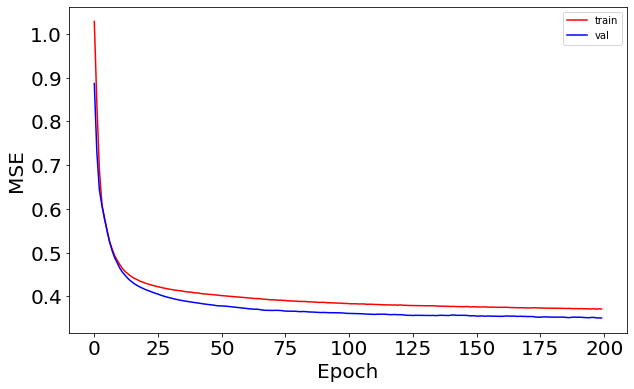

In [37]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Comparación de modelos

In [38]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE
0,LR,0.181585
1,Ridge,0.181576
2,RF,0.106677
3,Tree,0.115145
4,SVR,0.151407
5,NN,0.126475


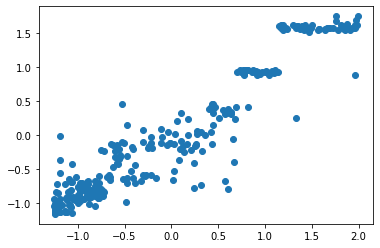

In [39]:
# Make cross validated predictions
predictions = cross_val_predict(new_model_RF, X_test, y_test, cv=6)
plt.scatter(y_test, predictions)

In [40]:
accuracy = metrics.r2_score(y_test, predictions)
accuracy

0.8974372179126755